In [1]:
#this is copying a kernel from Kaggle to give a head start on the comp...

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #adjustment required...
# # List files available
# print(os.listdir("../input/"))

In [3]:
# Training data
app_train = pd.read_csv('/home/cdsw/HomeCredit_Data/home-credit/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Testing data features
app_test = pd.read_csv('/home/cdsw/HomeCredit_Data/home-credit/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

In [6]:
print(app_train['TARGET'].value_counts())
app_train.TARGET.sum()/app_train.shape[0]


0    282686
1     24825
Name: TARGET, dtype: int64


0.08072881945686496

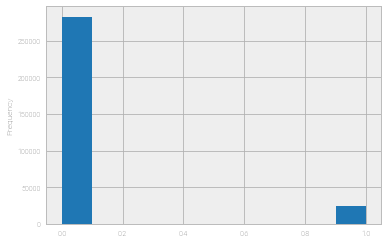

In [7]:
app_train['TARGET'].astype(int).plot.hist();

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:

# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [10]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
# app_train.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:

# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [14]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [15]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [16]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

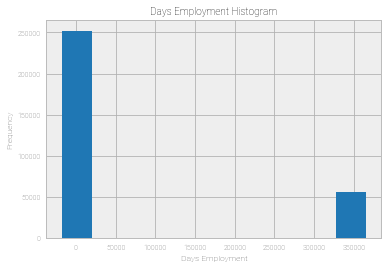

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [18]:

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


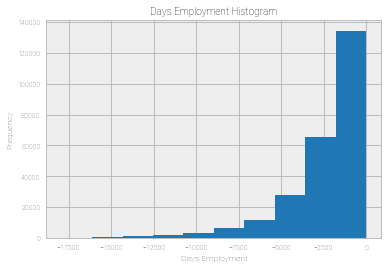

In [19]:

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = np.where(app_train["DAYS_EMPLOYED"] == 365243,1,0)

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [20]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [21]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [22]:

# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

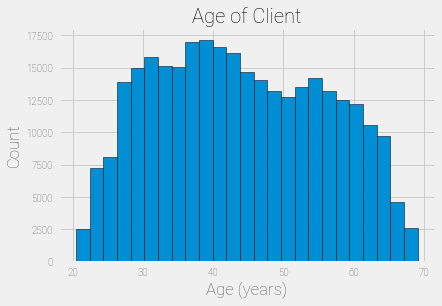

In [23]:

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

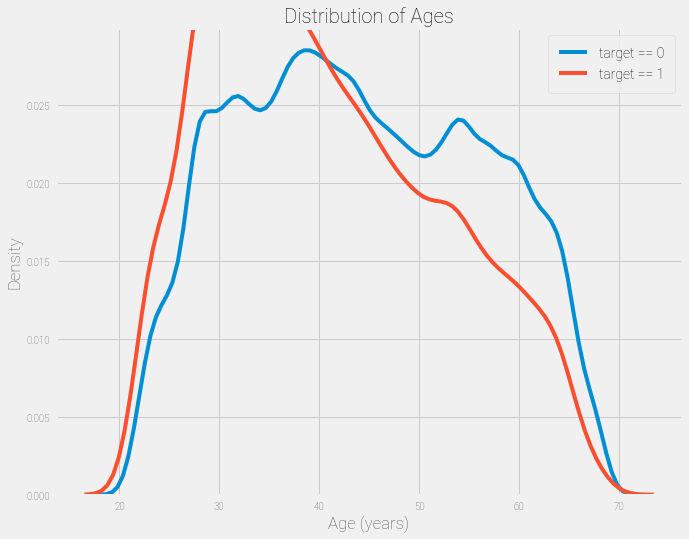

In [24]:

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [25]:

# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [26]:

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

In [27]:
# plt.figure(figsize = (8, 8))

# # Graph the age bins and the average of the target as a bar plot
# plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# # Plot labeling
# plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
# plt.title('Failure to Repay by Age Group');

In [28]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

In [29]:

# plt.figure(figsize = (8, 6))

# # Heatmap of correlations
# sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
# plt.title('Correlation Heatmap');

In [30]:
# plt.figure(figsize = (10, 12))
# ​
# # iterate through the sources
# for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
#     # create a new subplot for each source
#     plt.subplot(3, 1, i + 1)
#     # plot repaid loans
#     sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
#     # plot loans that were not repaid
#     sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
#     # Label the plots
#     plt.title('Distribution of %s by Target Value' % source)
#     plt.xlabel('%s' % source); plt.ylabel('Density');
    
# plt.tight_layout(h_pad = 2.5)
    

In [31]:
# # Copy the data for plotting
# plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# # Add in the age of the client in years
# plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# # Drop na values and limit to first 100000 rows
# plot_data = plot_data.dropna().loc[:100000, :]

# # Function to calculate correlation coefficient between two columns
# def corr_func(x, y, **kwargs):
#     r = np.corrcoef(x, y)[0][1]
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.2, .8), xycoords=ax.transAxes,
#                 size = 20)

# # Create the pairgrid object
# grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
#                     hue = 'TARGET', 
#                     vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# # Upper is a scatter plot
# grid.map_upper(plt.scatter, alpha = 0.2)

# # Diagonal is a histogram
# grid.map_diag(sns.kdeplot)

# # Bottom is density plot
# grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

# plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [32]:
# !pip3 install sklearn.preprocessing

In [33]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(['TARGET'],axis=1)

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [34]:

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [35]:

poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [36]:

# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [37]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [38]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [39]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [40]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 241 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: float64(66), int64(44), uint8(131)
memory usage: 296.5 MB


ValueError: array must not contain infs or NaNs

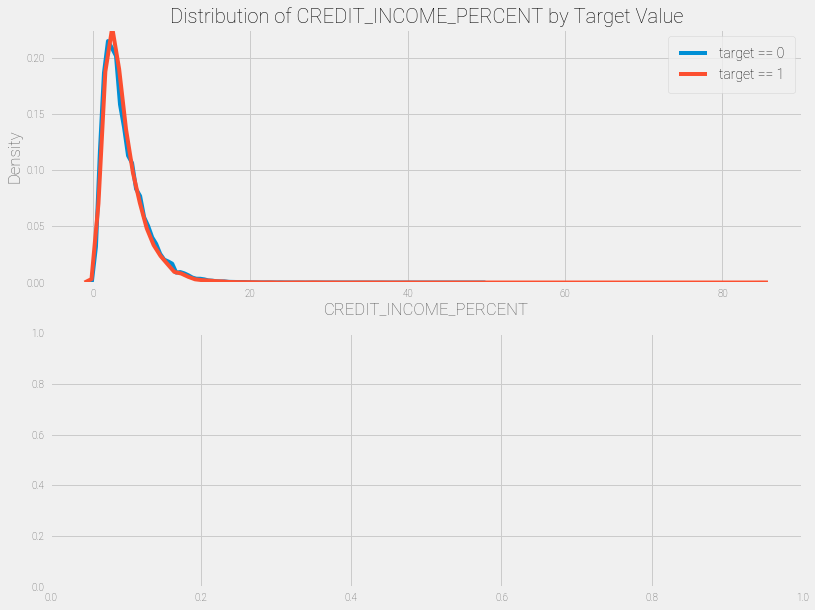

In [41]:
# plt.figure(figsize = (12, 20))
# # iterate through the new features
# for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
#     # create a new subplot for each source
#     plt.subplot(4, 1, i + 1)
#     # plot repaid loans
#     sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
#     # plot loans that were not repaid
#     sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
#     # Label the plots
#     plt.title('Distribution of %s by Target Value' % feature)
#     plt.xlabel('%s' % feature); plt.ylabel('Density');
    
# plt.tight_layout(h_pad = 2.5)

In [42]:
#creating the result without scaling: check the impact that has in xgboost
# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(['TARGET'],axis=1)
else:
    train = app_train.copy()
for col in train.columns:
    train[col].fillna(train[col].median(),inplace=True)


In [ ]:
train.COMMONAREA_MODE.fillna(train.COMMONAREA_MODE.median(),inplace=True)
print("done")

In [43]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

y1=app_train[["TARGET"]]
X1=train

X_mid,X_test, y_mid,y_test=train_test_split(X1,y1,test_size=0.2, random_state=432)

X_train,X_val,y_train,y_val=train_test_split(X_mid,y_mid,test_size=0.3,random_state=189)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval=xgb.DMatrix(X_val,label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)


In [44]:
params={"eta":0.3,
       "objective":"binary:logistic",
        "eval_metric":"auc",
       "max_depth":6,
       "min_child_weight":4,
       "subsample":0.8,
       "colsammple_bytree":0.8,
           "scale_pos_weight" : 1}
mod=xgb.train(params,
             dtrain,
             num_boost_round=999,
             evals=[(dtest,"Test")],
             early_stopping_rounds=10)

[0]	Test-auc:0.703192
Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-auc:0.712632
[2]	Test-auc:0.717985
[3]	Test-auc:0.720027
[4]	Test-auc:0.720594
[5]	Test-auc:0.723014
[6]	Test-auc:0.72398
[7]	Test-auc:0.72454
[8]	Test-auc:0.727322
[9]	Test-auc:0.731193
[10]	Test-auc:0.732804
[11]	Test-auc:0.734624
[12]	Test-auc:0.737016
[13]	Test-auc:0.737844
[14]	Test-auc:0.738864
[15]	Test-auc:0.738969
[16]	Test-auc:0.739633
[17]	Test-auc:0.740496
[18]	Test-auc:0.740796
[19]	Test-auc:0.740732
[20]	Test-auc:0.740812
[21]	Test-auc:0.740822
[22]	Test-auc:0.741327
[23]	Test-auc:0.741596
[24]	Test-auc:0.741777
[25]	Test-auc:0.741594
[26]	Test-auc:0.741819
[27]	Test-auc:0.742095
[28]	Test-auc:0.741827
[29]	Test-auc:0.741966
[30]	Test-auc:0.741834
[31]	Test-auc:0.741706
[32]	Test-auc:0.741567
[33]	Test-auc:0.741413
[34]	Test-auc:0.741293
[35]	Test-auc:0.741274
[36]	Test-auc:0.741154
[37]	Test-auc:0.741073
Stopping. Best iteration:
[27]	Test-auc:0.742095



In [56]:
#write a for loop that picks up every cut by 0.1 and records this
compare=pd.DataFrame(y_val)
compare.reset_index(drop=True,inplace=True)
compare_test=pd.DataFrame(y_test)
compare_test.reset_index(drop=True,inplace=True)
for cutoff in(np.linspace(0.1,0.9,9)):
    compare["preds_prob"]=mod.predict(dval)
    compare["Prediction_Class"]=np.where(compare.preds_prob<cutoff,0,1)
    compare["TP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==1),1,0)
    compare["FP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==0),1,0)
    compare["FN"]=np.where((compare.Prediction_Class==0) & (compare.TARGET==1),1,0)
    pres=compare.TP.sum()/(compare.TP.sum()+compare.FP.sum())
    rec=compare.TP.sum()/(compare.TP.sum()+compare.FN.sum())
    a=pd.Series(params).to_frame().transpose()
    a["Precision_val"]=pres
    a["Recall_val"]=rec
    a["Cutoff"]=cutoff
#repeat for test
    compare_test["preds_prob"]=mod.predict(dtest)
    compare_test["Prediction_Class"]=np.where(compare_test.preds_prob<cutoff,0,1)
    compare_test["TP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==1),1,0)
    compare_test["FP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==0),1,0)
    compare_test["FN"]=np.where((compare_test.Prediction_Class==0) & (compare_test.TARGET==1),1,0)
    pres=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FP.sum())
    rec=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FN.sum())
    a["Precision_test"]=pres
    a["Recall_test"]=rec
    if cutoff==0.1:
        Mod_Sum_gen=a
    else:
        Mod_Sum_gen=pd.concat([Mod_Sum_gen,a],axis=0)
#     Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
Mod_Sum_gen

colsammple_bytree  eta eval_metric max_depth min_child_weight  \
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   
0               0.8  0.3         auc         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic                1       0.8       0.184178    0.577594   
0  binary:logistic                1       0.8       0.276459    0.275850   
0  binary:logistic                1       0.8       0.363158    0.128448   
0  binary:logistic                1       0.8       0.420673    0.059232   
0  binary:logistic                1       0.8       0.464832    0.025723   
0  binary:logistic                1       0.8       0.596330    0.011000   
0  binary:logistic                1       0.8       0.600000    0.004062   
0  binary:logistic                1       0.8       0.714286    0.000846   
0  binary:logistic                1       0.8       1.000000    0.000338   

   Cutoff  Precision_test  Recall_test  
0     0.1        0.184244     0.572871  
0     0.2        0.271460     0.269901  
0     0.3        0.346398     0.129505  
0     0.4        0.411685     0.060000  
0     0.5        0.477966     0.027921  
0     0.6        0.510638     0.009505  
0     0.7        0.714286     0.003960  
0     0.8        0.666667     0.000792  
0     0.9             NaN     0.000000

In [59]:
#write a for loop that picks up every cut by 0.1 and records this
compare=pd.DataFrame(y_val)
compare.reset_index(drop=True,inplace=True)
compare_test=pd.DataFrame(y_test)
compare_test.reset_index(drop=True,inplace=True)
for cutoff in(np.linspace(0.01,0.99,99)):
    compare["preds_prob"]=mod25.predict(dval)
    compare["Prediction_Class"]=np.where(compare.preds_prob<cutoff,0,1)
    compare["TP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==1),1,0)
    compare["FP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==0),1,0)
    compare["FN"]=np.where((compare.Prediction_Class==0) & (compare.TARGET==1),1,0)
    pres=compare.TP.sum()/(compare.TP.sum()+compare.FP.sum())
    rec=compare.TP.sum()/(compare.TP.sum()+compare.FN.sum())
    a=pd.Series(params).to_frame().transpose()
    a["Precision_val"]=pres
    a["Recall_val"]=rec
    a["Cutoff"]=cutoff
#repeat for test
    compare_test["preds_prob"]=mod25.predict(dtest)
    compare_test["Prediction_Class"]=np.where(compare_test.preds_prob<cutoff,0,1)
    compare_test["TP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==1),1,0)
    compare_test["FP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==0),1,0)
    compare_test["FN"]=np.where((compare_test.Prediction_Class==0) & (compare_test.TARGET==1),1,0)
    pres=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FP.sum())
    rec=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FN.sum())
    a["Precision_test"]=pres
    a["Recall_test"]=rec
    if cutoff==0.1:
        Mod_Sum=a
    else:
        Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
#     Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
Mod_Sum

colsammple_bytree  eta eval_metric max_depth min_child_weight  \
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
..               ...  ...         ...       ...              ...   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6            

In [57]:
Mod_Sum_gen.iplot(kind="scatter",x="Recall_val",y="Precision_val")

In [61]:
params={"eta":0.3,
       "objective":"binary:logistic",
        "eval_metric":"auc",
       "max_depth":6,
       "min_child_weight":4,
       "subsample":0.8,
       "colsammple_bytree":0.8,
           "scale_pos_weight" : 2.5}
mod25=xgb.train(params,
             dtrain,
             num_boost_round=999,
             evals=[(dtest,"Test")],
             early_stopping_rounds=10)

[0]	Test-auc:0.70393
Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-auc:0.714689
[2]	Test-auc:0.719104
[3]	Test-auc:0.721084
[4]	Test-auc:0.723338
[5]	Test-auc:0.725771
[6]	Test-auc:0.728983
[7]	Test-auc:0.730045
[8]	Test-auc:0.731235
[9]	Test-auc:0.733503
[10]	Test-auc:0.735854
[11]	Test-auc:0.736573
[12]	Test-auc:0.736787
[13]	Test-auc:0.73689
[14]	Test-auc:0.737757
[15]	Test-auc:0.7382
[16]	Test-auc:0.738735
[17]	Test-auc:0.739752
[18]	Test-auc:0.74032
[19]	Test-auc:0.740553
[20]	Test-auc:0.740334
[21]	Test-auc:0.740307
[22]	Test-auc:0.740635
[23]	Test-auc:0.740547
[24]	Test-auc:0.740696
[25]	Test-auc:0.740675
[26]	Test-auc:0.740835
[27]	Test-auc:0.740624
[28]	Test-auc:0.740594
[29]	Test-auc:0.740678
[30]	Test-auc:0.740545
[31]	Test-auc:0.740502
[32]	Test-auc:0.740196
[33]	Test-auc:0.739985
[34]	Test-auc:0.739966
[35]	Test-auc:0.739596
[36]	Test-auc:0.739427
Stopping. Best iteration:
[26]	Test-auc:0.740835



In [ ]:
# Create the code for at every cut off, then round the recall, and create lookups, fillna with mean of either side and plot


In [62]:
#write a for loop that picks up every cut by 0.1 and records this
compare=pd.DataFrame(y_val)
compare.reset_index(drop=True,inplace=True)
compare_test=pd.DataFrame(y_test)
compare_test.reset_index(drop=True,inplace=True)
for cutoff in(np.linspace(0.01,0.99,99)):
    compare["preds_prob"]=mod25.predict(dval)
    compare["Prediction_Class"]=np.where(compare.preds_prob<cutoff,0,1)
    compare["TP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==1),1,0)
    compare["FP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==0),1,0)
    compare["FN"]=np.where((compare.Prediction_Class==0) & (compare.TARGET==1),1,0)
    pres=compare.TP.sum()/(compare.TP.sum()+compare.FP.sum())
    rec=compare.TP.sum()/(compare.TP.sum()+compare.FN.sum())
    a=pd.Series(params).to_frame().transpose()
    a["Precision_val"]=pres
    a["Recall_val"]=rec
    a["Cutoff"]=cutoff
#repeat for test
    compare_test["preds_prob"]=mod25.predict(dtest)
    compare_test["Prediction_Class"]=np.where(compare_test.preds_prob<cutoff,0,1)
    compare_test["TP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==1),1,0)
    compare_test["FP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==0),1,0)
    compare_test["FN"]=np.where((compare_test.Prediction_Class==0) & (compare_test.TARGET==1),1,0)
    pres=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FP.sum())
    rec=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FN.sum())
    a["Precision_test"]=pres
    a["Recall_test"]=rec

    Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
#     Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
Mod_Sum

colsammple_bytree  eta eval_metric max_depth min_child_weight  \
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
..               ...  ...         ...       ...              ...   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6                4   
0                0.8  0.3         auc         6            

In [63]:
import plotly.express as px
fig = px.scatter(Mod_Sum, x="Recall_val", y="Precision_val", color="scale_pos_weight")
fig.show()

In [64]:
import plotly.express as px
fig = px.scatter(Mod_Sum, x="Recall_test", y="Precision_test", color="scale_pos_weight")
fig.show()

In [68]:
#compare the test and train versions for each - which is more stable
twenty5=Mod_Sum[Mod_Sum.scale_pos_weight==2.5]
twenty5_2=twenty5[["scale_pos_weight","Recall_test","Precision_test"]]
twenty5_2["Type"]="Test"
plus25=twenty5[["scale_pos_weight","Recall_val","Precision_val"]]
plus25["Type"]="Validation"
plus25.rename(columns=({"Recall_val":"Recall_test","Precision_val":"Precision_test"}),inplace=True)
twenty5_3=pd.concat([twenty5_2,plus25],axis=0)

fig = px.scatter(twenty5_3, x="Recall_test", y="Precision_test", color="Type")
fig.show()

In [69]:
#compare the test and train versions for each - which is more stable
one=Mod_Sum[Mod_Sum.scale_pos_weight==1]
one_2=one[["scale_pos_weight","Recall_test","Precision_test"]]
one_2["Type"]="Test"
plus1=twenty5[["scale_pos_weight","Recall_val","Precision_val"]]
plus1["Type"]="Validation"
plus1.rename(columns=({"Recall_val":"Recall_test","Precision_val":"Precision_test"}),inplace=True)
one_3=pd.concat([twenty5_2,plus25],axis=0)

fig = px.scatter(one_3, x="Recall_test", y="Precision_test", color="Type")
fig.show()

In [77]:

# but here take copy, create diff to the val value.. always positive so can see and set size to diff
play=Mod_Sum[Mod_Sum.Recall_test>0.01]
play["Diff"]=play.Precision_test-play.Precision_val
play["Diff_pos"]=np.where(play.Diff<0,play.Diff*-1,play.Diff)
play.Diff_pos.fillna(0,inplace=True)

In [78]:
fig = px.scatter(play, x="Recall_test", y="Precision_test", color="scale_pos_weight",size="Diff_pos")
fig.show()

In [79]:
fig = px.scatter(play, x="Recall_val", y="Precision_val", color="scale_pos_weight",size="Diff_pos")
fig.show()

In [ ]:
#need to run at 3.1 for the real point you want
#need to add in 20 to make the point you want...

In [81]:
params["scale_pos_weight"]= 3.1
mod_real25=xgb.train(params,
             dtrain,
             num_boost_round=999,
             evals=[(dtest,"Test")],
             early_stopping_rounds=10)

[0]	Test-auc:0.703276
Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-auc:0.715395
[2]	Test-auc:0.720016
[3]	Test-auc:0.723029
[4]	Test-auc:0.72507
[5]	Test-auc:0.726576
[6]	Test-auc:0.729249
[7]	Test-auc:0.731566
[8]	Test-auc:0.733308
[9]	Test-auc:0.736412
[10]	Test-auc:0.73752
[11]	Test-auc:0.740058
[12]	Test-auc:0.740809
[13]	Test-auc:0.74092
[14]	Test-auc:0.741287
[15]	Test-auc:0.741394
[16]	Test-auc:0.741515
[17]	Test-auc:0.742326
[18]	Test-auc:0.74264
[19]	Test-auc:0.74351
[20]	Test-auc:0.743651
[21]	Test-auc:0.743749
[22]	Test-auc:0.744401
[23]	Test-auc:0.744325
[24]	Test-auc:0.744496
[25]	Test-auc:0.744068
[26]	Test-auc:0.74456
[27]	Test-auc:0.744287
[28]	Test-auc:0.744196
[29]	Test-auc:0.744196
[30]	Test-auc:0.74402
[31]	Test-auc:0.743993
[32]	Test-auc:0.74411
[33]	Test-auc:0.743752
[34]	Test-auc:0.743743
[35]	Test-auc:0.743553
[36]	Test-auc:0.743261
Stopping. Best iteration:
[26]	Test-auc:0.74456



In [82]:
#write a for loop that picks up every cut by 0.1 and records this
compare=pd.DataFrame(y_val)
compare.reset_index(drop=True,inplace=True)
compare_test=pd.DataFrame(y_test)
compare_test.reset_index(drop=True,inplace=True)
for cutoff in(np.linspace(0.01,0.99,99)):
    compare["preds_prob"]=mod_real25.predict(dval)
    compare["Prediction_Class"]=np.where(compare.preds_prob<cutoff,0,1)
    compare["TP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==1),1,0)
    compare["FP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==0),1,0)
    compare["FN"]=np.where((compare.Prediction_Class==0) & (compare.TARGET==1),1,0)
    pres=compare.TP.sum()/(compare.TP.sum()+compare.FP.sum())
    rec=compare.TP.sum()/(compare.TP.sum()+compare.FN.sum())
    a=pd.Series(params).to_frame().transpose()
    a["Precision_val"]=pres
    a["Recall_val"]=rec
    a["Cutoff"]=cutoff
#repeat for test
    compare_test["preds_prob"]=mod_real25.predict(dtest)
    compare_test["Prediction_Class"]=np.where(compare_test.preds_prob<cutoff,0,1)
    compare_test["TP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==1),1,0)
    compare_test["FP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==0),1,0)
    compare_test["FN"]=np.where((compare_test.Prediction_Class==0) & (compare_test.TARGET==1),1,0)
    pres=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FP.sum())
    rec=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FN.sum())
    a["Precision_test"]=pres
    a["Recall_test"]=rec

    Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
#     Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
Mod_Sum

Cutoff      Diff  Diff_pos  Precision_test  Precision_val  Recall_test  \
0     0.01  0.002471  0.002471        0.084417       0.081946     0.997426   
0     0.02  0.002837  0.002837        0.093233       0.090396     0.971485   
0     0.03  0.001739  0.001739        0.104301       0.102562     0.921584   
0     0.04  0.001031  0.001031        0.116392       0.115361     0.867525   
0     0.05  0.001063  0.001063        0.128642       0.127579     0.815644   
0     0.06  0.000571  0.000571        0.140235       0.139665     0.759604   
0     0.07  0.001907  0.001907        0.152320       0.150413     0.711683   
0     0.08  0.001039  0.001039        0.163138       0.162099     0.660594   
0     0.09  0.000369  0.000369        0.174354       0.173985     0.619010   
0     0.10  0.000066  0.000066        0.184244       0.184178     0.572871   
0     0.11 -0.000045  0.000045        0.194663       0.194708     0.534455   
0     0.12  0.000540  0.000540        0.203919       0.203379     0.492475   
0     0.13  0.000190  0.000190        0.213522       0.213332     0.459010   
0     0.14 -0.000343  0.000343        0.222153       0.222496     0.424554   
0     0.15  0.000417  0.000417        0.232755       0.232337     0.398218   
0     0.16  0.001184  0.001184        0.242968       0.241784     0.372871   
0     0.17  0.001472  0.001472        0.252925       0.251453     0.346733   
0     0.18 -0.001186  0.001186        0.258701       0.259887     0.319406   
0     0.19 -0.004732  0.004732        0.265633       0.270365     0.295248   
0     0.20 -0.004999  0.004999        0.271460       0.276459     0.269901   
0     0.21 -0.003924  0.003924        0.280879       0.284803     0.253069   
0     0.22 -0.004465  0.004465        0.286863       0.291329     0.233069   
0     0.23 -0.009631  0.009631        0.293721       0.303353     0.215842   
0     0.24 -0.011394  0.011394        0.303075       0.314469     0.202970   
0     0.25 -0.010118  0.010118        0.308694       0.318812     0.187723   
0     0.26 -0.007380  0.007380        0.317308       0.324688     0.176436   
0     0.27 -0.003175  0.003175        0.330043       0.333218     0.165545   
0     0.28 -0.001349  0.001349        0.336690       0.338039     0.152277   
0     0.29 -0.011100  0.011100        0.340712       0.351812     0.140198   
0     0.30 -0.016760  0.016760        0.346398       0.363158     0.129505   
..     ...       ...       ...             ...            ...          ...   
0     0.70       NaN       NaN        0.431330       0.440840     0.039802   
0     0.71       NaN       NaN        0.426799       0.448718     0.034059   
0     0.72       NaN       NaN        0.436416       0.453202     0.029901   
0     0.73       NaN       NaN        0.436482       0.461756     0.026535   
0     0.74       NaN       NaN        0.464945       0.465116     0.024950   
0     0.75       NaN       NaN        0.459227       0.475472     0.021188   
0     0.76       NaN       NaN        0.466321       0.480687     0.017822   
0     0.77       NaN       NaN        0.472393       0.480769     0.015248   
0     0.78       NaN       NaN        0.478261       0.508571     0.013069   
0     0.79       NaN       NaN        0.478992       0.527397     0.011287   
0     0.80       NaN       NaN        0.489583       0.520661     0.009307   
0     0.81       NaN       NaN        0.518987       0.554455     0.008119   
0     0.82       NaN       NaN        0.537313       0.558140     0.007129   
0     0.83       NaN       NaN        0.500000       0.594203     0.005149   
0     0.84       NaN       NaN        0.500000       0.653061     0.003762   
0     0.85       NaN       NaN        0.535714       0.638889     0.002970   
0     0.86       NaN       NaN        0.555556       0.592593     0.001980   
0     0.87       NaN       NaN        0.600000       0.733333     0.001188   
0     0.88       NaN       NaN        0.625000       0.700000     0.000990   
0     0.89       NaN      

In [83]:
100/8

12.5

In [85]:
params["scale_pos_weight"]= 12.5
mod_balanced=xgb.train(params,
             dtrain,
             num_boost_round=999,
             evals=[(dtest,"Test")],
             early_stopping_rounds=10)

[0]	Test-auc:0.703902
Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-auc:0.714044
[2]	Test-auc:0.718256
[3]	Test-auc:0.723505
[4]	Test-auc:0.726193
[5]	Test-auc:0.728147
[6]	Test-auc:0.730316
[7]	Test-auc:0.731311
[8]	Test-auc:0.733169
[9]	Test-auc:0.734253
[10]	Test-auc:0.736432
[11]	Test-auc:0.737405
[12]	Test-auc:0.737762
[13]	Test-auc:0.73787
[14]	Test-auc:0.738072
[15]	Test-auc:0.738595
[16]	Test-auc:0.739184
[17]	Test-auc:0.739132
[18]	Test-auc:0.73915
[19]	Test-auc:0.739301
[20]	Test-auc:0.739414
[21]	Test-auc:0.73934
[22]	Test-auc:0.740009
[23]	Test-auc:0.740438
[24]	Test-auc:0.74031
[25]	Test-auc:0.739627
[26]	Test-auc:0.739613
[27]	Test-auc:0.739734
[28]	Test-auc:0.739657
[29]	Test-auc:0.739175
[30]	Test-auc:0.739235
[31]	Test-auc:0.739413
[32]	Test-auc:0.739547
[33]	Test-auc:0.739322
Stopping. Best iteration:
[23]	Test-auc:0.740438



In [136]:
#write a for loop that picks up every cut by 0.1 and records this
compare=pd.DataFrame(y_val)
compare.reset_index(drop=True,inplace=True)
compare_test=pd.DataFrame(y_test)
compare_test.reset_index(drop=True,inplace=True)
for cutoff in(np.linspace(0.01,0.99,99)):
    compare["preds_prob"]=mod_balanced.predict(dval)
    compare["Prediction_Class"]=np.where(compare.preds_prob<cutoff,0,1)
    compare["TP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==1),1,0)
    compare["FP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==0),1,0)
    compare["FN"]=np.where((compare.Prediction_Class==0) & (compare.TARGET==1),1,0)
    pres=compare.TP.sum()/(compare.TP.sum()+compare.FP.sum())
    rec=compare.TP.sum()/(compare.TP.sum()+compare.FN.sum())
    a=pd.Series(params).to_frame().transpose()
    a["Precision_val"]=pres
    a["Recall_val"]=rec
    a["Cutoff"]=cutoff
#repeat for test
    compare_test["preds_prob"]=mod_balanced.predict(dtest)
    compare_test["Prediction_Class"]=np.where(compare_test.preds_prob<cutoff,0,1)
    compare_test["TP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==1),1,0)
    compare_test["FP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==0),1,0)
    compare_test["FN"]=np.where((compare_test.Prediction_Class==0) & (compare_test.TARGET==1),1,0)
    pres=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FP.sum())
    rec=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FN.sum())
    a["Precision_test"]=pres
    a["Recall_test"]=rec

    Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
#     Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
Mod_Sum

Cutoff      Diff  Diff_pos  Precision_test  Precision_val  Recall_test  \
0     0.01  0.002471  0.002471        0.084417       0.081946     0.997426   
0     0.02  0.002837  0.002837        0.093233       0.090396     0.971485   
0     0.03  0.001739  0.001739        0.104301       0.102562     0.921584   
0     0.04  0.001031  0.001031        0.116392       0.115361     0.867525   
0     0.05  0.001063  0.001063        0.128642       0.127579     0.815644   
0     0.06  0.000571  0.000571        0.140235       0.139665     0.759604   
0     0.07  0.001907  0.001907        0.152320       0.150413     0.711683   
0     0.08  0.001039  0.001039        0.163138       0.162099     0.660594   
0     0.09  0.000369  0.000369        0.174354       0.173985     0.619010   
0     0.10  0.000066  0.000066        0.184244       0.184178     0.572871   
0     0.11 -0.000045  0.000045        0.194663       0.194708     0.534455   
0     0.12  0.000540  0.000540        0.203919       0.203379     0.492475   
0     0.13  0.000190  0.000190        0.213522       0.213332     0.459010   
0     0.14 -0.000343  0.000343        0.222153       0.222496     0.424554   
0     0.15  0.000417  0.000417        0.232755       0.232337     0.398218   
0     0.16  0.001184  0.001184        0.242968       0.241784     0.372871   
0     0.17  0.001472  0.001472        0.252925       0.251453     0.346733   
0     0.18 -0.001186  0.001186        0.258701       0.259887     0.319406   
0     0.19 -0.004732  0.004732        0.265633       0.270365     0.295248   
0     0.20 -0.004999  0.004999        0.271460       0.276459     0.269901   
0     0.21 -0.003924  0.003924        0.280879       0.284803     0.253069   
0     0.22 -0.004465  0.004465        0.286863       0.291329     0.233069   
0     0.23 -0.009631  0.009631        0.293721       0.303353     0.215842   
0     0.24 -0.011394  0.011394        0.303075       0.314469     0.202970   
0     0.25 -0.010118  0.010118        0.308694       0.318812     0.187723   
0     0.26 -0.007380  0.007380        0.317308       0.324688     0.176436   
0     0.27 -0.003175  0.003175        0.330043       0.333218     0.165545   
0     0.28 -0.001349  0.001349        0.336690       0.338039     0.152277   
0     0.29 -0.011100  0.011100        0.340712       0.351812     0.140198   
0     0.30 -0.016760  0.016760        0.346398       0.363158     0.129505   
..     ...       ...       ...             ...            ...          ...   
0     0.70       NaN       NaN        0.238331       0.240778     0.361980   
0     0.71       NaN       NaN        0.243718       0.246319     0.343762   
0     0.72       NaN       NaN        0.249240       0.252845     0.324752   
0     0.73       NaN       NaN        0.255749       0.257240     0.306139   
0     0.74       NaN       NaN        0.263962       0.263805     0.287327   
0     0.75       NaN       NaN        0.268654       0.272820     0.265941   
0     0.76       NaN       NaN        0.277313       0.280901     0.249307   
0     0.77       NaN       NaN        0.284531       0.289086     0.231287   
0     0.78       NaN       NaN        0.291791       0.302244     0.213267   
0     0.79       NaN       NaN        0.299299       0.312317     0.194455   
0     0.80       NaN       NaN        0.309192       0.326748     0.175842   
0     0.81       NaN       NaN        0.320381       0.339242     0.160000   
0     0.82       NaN       NaN        0.330738       0.353106     0.142970   
0     0.83       NaN       NaN        0.350245       0.360132     0.127129   
0     0.84       NaN       NaN        0.363036       0.372538     0.108911   
0     0.85       NaN       NaN        0.379615       0.387252     0.093663   
0     0.86       NaN       NaN        0.392965       0.406250     0.077426   
0     0.87       NaN       NaN        0.418301       0.428571     0.063366   
0     0.88       NaN       NaN        0.452962       0.440751     0.051485   
0     0.89       NaN      

In [95]:

# but here take copy, create diff to the val value.. always positive so can see and set size to diff
play=Mod_Sum[(Mod_Sum.Recall_test>0.01) & (~Mod_Sum.scale_pos_weight.isin([2.5,1]))]
play["Diff"]=play.Precision_test-play.Precision_val
play["Diff_pos"]=np.where(play.Diff<0,play.Diff*-1,play.Diff)
play.Diff_pos.fillna(0,inplace=True)

In [116]:
fig = px.scatter(play, x="Recall_val", y="Precision_val", color="scale_pos_weight",size="Diff_pos")
fig.update_layout(legend=dict(x=0.75, y=1))
fig.show()

In [97]:
fig = px.scatter(play, x="Recall_test", y="Precision_test", color="scale_pos_weight",size="Diff_pos")
fig.show()

In [105]:
#better granularity, and better accuracy
print(play[play.Recall_val>0.2].groupby(["scale_pos_weight"])["Diff_pos"].mean())
print(play[(play.Recall_val<0.2) &(play.Recall_val>0.1)].groupby(["scale_pos_weight"])["Diff_pos"].mean())
print(play[play.Recall_val<0.1].groupby(["scale_pos_weight"])["Diff_pos"].mean())

scale_pos_weight
3.1     0.002760
12.5    0.002367
Name: Diff_pos, dtype: float64
scale_pos_weight
3.1     0.007449
12.5    0.015199
Name: Diff_pos, dtype: float64
scale_pos_weight
3.1     0.017627
12.5    0.023572
Name: Diff_pos, dtype: float64


In [133]:
vals=pd.DataFrame({"Recall_val":[0,0.1,0.2],"Recall_Cuts":["1) Less than 0.1","2) Between 0.1 & 0.2","3) Over 0.2"]})
play2=pd.merge_asof(play.sort_values(by="Recall_val"),vals, on="Recall_val")

In [129]:
play2[(play2.Recall_val>=0.1)& (play2.Recall_val<=0.2)].Recall_Cuts.value_counts()

Between 0.1 & 0.2    16
Name: Recall_Cuts, dtype: int64

In [134]:
play2.groupby(["Recall_Cuts","scale_pos_weight"])["Diff_pos"].mean().round(3)

Recall_Cuts           scale_pos_weight
1) Less than 0.1      3.1                 0.018
                      12.5                0.024
2) Between 0.1 & 0.2  3.1                 0.007
                      12.5                0.015
3) Over 0.2           3.1                 0.003
                      12.5                0.002
Name: Diff_pos, dtype: float64

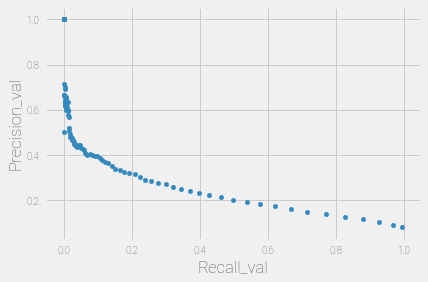

In [52]:
Mod_Sum.plot(kind="scatter",x="Recall_val",y="Precision_val")

In [53]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
init_notebook_mode(connected=False)
import cufflinks as cf
cf.go_offline()

In [54]:
Mod_Sum.iplot(kind="scatter",x="Recall_val",y="Precision_val")

In [231]:
#save the Mod_Sum as the master to append to
Mod_Sum_Master=Mod_Sum

In [234]:

def run_mod_update(var,val):
    '''runs an update of the model with the one updated version of the parameters, runs a for loop for every cut off
    and records the results and adds to the evaluation master'''
    params[var]=val
    mod = xgb.train(
        params,
        dtrain,
        num_boost_round=999,
        evals=[(dval, "Val")],
        early_stopping_rounds=10
    )
#create a function that runs the model with the one update, and then adds the data to Mod_Sum_Master
#write a for loop that picks up every cut by 0.1 and records this
    compare=pd.DataFrame(y_val)
    compare.reset_index(drop=True,inplace=True)
    compare_test=pd.DataFrame(y_test)
    compare_test.reset_index(drop=True,inplace=True)
    for cutoff in(np.linspace(0.1,0.9,9)):
        compare["preds_prob"]=mod.predict(dval)
        compare["Prediction_Class"]=np.where(compare.preds_prob<cutoff,0,1)
        compare["TP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==1),1,0)
        compare["FP"]=np.where((compare.Prediction_Class==1) & (compare.TARGET==0),1,0)
        compare["FN"]=np.where((compare.Prediction_Class==0) & (compare.TARGET==1),1,0)
        pres=compare.TP.sum()/(compare.TP.sum()+compare.FP.sum())
        rec=compare.TP.sum()/(compare.TP.sum()+compare.FN.sum())
        a=pd.Series(params).to_frame().transpose()
        a["Precision_val"]=pres
        a["Recall_val"]=rec
        a["Cutoff"]=cutoff
    #repeat for test
        compare_test["preds_prob"]=mod.predict(dtest)
        compare_test["Prediction_Class"]=np.where(compare_test.preds_prob<cutoff,0,1)
        compare_test["TP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==1),1,0)
        compare_test["FP"]=np.where((compare_test.Prediction_Class==1) & (compare_test.TARGET==0),1,0)
        compare_test["FN"]=np.where((compare_test.Prediction_Class==0) & (compare_test.TARGET==1),1,0)
        pres=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FP.sum())
        rec=compare_test.TP.sum()/(compare_test.TP.sum()+compare_test.FN.sum())
        a["Precision_test"]=pres
        a["Recall_test"]=rec
        if cutoff==0.1:
            Mod_Sum=a
        else:
            Mod_Sum=pd.concat([Mod_Sum,a],axis=0)
    global Mod_Sum_Master
    Mod_Sum_Master=pd.concat([Mod_Sum_Master, Mod_Sum],axis=0)


In [235]:
for met_type in ["auc","ndcg","map","logloss","error"]:
    params["eval_metric"]=met_type
    for wt in [1,2.5,5,10,20]:
        params["scale_pos_weight"]=wt
        for et in [0.3,0.1,0.05,0.01]:
            run_mod_update("eta",et)

[0]	Val-auc:0.710081
Will train until Val-auc hasn't improved in 10 rounds.
[1]	Val-auc:0.719217
[2]	Val-auc:0.721957
[3]	Val-auc:0.723636
[4]	Val-auc:0.724607
[5]	Val-auc:0.727304
[6]	Val-auc:0.72896
[7]	Val-auc:0.729813
[8]	Val-auc:0.732388
[9]	Val-auc:0.735373
[10]	Val-auc:0.736612
[11]	Val-auc:0.738038
[12]	Val-auc:0.740376
[13]	Val-auc:0.742154
[14]	Val-auc:0.743309
[15]	Val-auc:0.743915
[16]	Val-auc:0.744088
[17]	Val-auc:0.744951
[18]	Val-auc:0.74581
[19]	Val-auc:0.746312
[20]	Val-auc:0.746219
[21]	Val-auc:0.746445
[22]	Val-auc:0.746458
[23]	Val-auc:0.746297
[24]	Val-auc:0.746793
[25]	Val-auc:0.747413
[26]	Val-auc:0.74734
[27]	Val-auc:0.747312
[28]	Val-auc:0.747602
[29]	Val-auc:0.74748
[30]	Val-auc:0.747635
[31]	Val-auc:0.747309
[32]	Val-auc:0.747342
[33]	Val-auc:0.747456
[34]	Val-auc:0.747403
[35]	Val-auc:0.747381
[36]	Val-auc:0.747075
[37]	Val-auc:0.747336
[38]	Val-auc:0.747582
[39]	Val-auc:0.747696
[40]	Val-auc:0.747652
[41]	Val-auc:0.747573
[42]	Val-auc:0.747355
[43]	Val-auc:

[176]	Val-auc:0.75359
[177]	Val-auc:0.753632
[178]	Val-auc:0.75363
[179]	Val-auc:0.753621
[180]	Val-auc:0.75377
[181]	Val-auc:0.753901
[182]	Val-auc:0.753882
[183]	Val-auc:0.753924
[184]	Val-auc:0.753935
[185]	Val-auc:0.753984
[186]	Val-auc:0.754016
[187]	Val-auc:0.75401
[188]	Val-auc:0.75399
[189]	Val-auc:0.754031
[190]	Val-auc:0.75404
[191]	Val-auc:0.754079
[192]	Val-auc:0.754142
[193]	Val-auc:0.754215
[194]	Val-auc:0.754266
[195]	Val-auc:0.754291
[196]	Val-auc:0.754293
[197]	Val-auc:0.754404
[198]	Val-auc:0.754479
[199]	Val-auc:0.75446
[200]	Val-auc:0.754475
[201]	Val-auc:0.754535
[202]	Val-auc:0.754588
[203]	Val-auc:0.754575
[204]	Val-auc:0.754573
[205]	Val-auc:0.754596
[206]	Val-auc:0.754646
[207]	Val-auc:0.754685
[208]	Val-auc:0.754673
[209]	Val-auc:0.754692
[210]	Val-auc:0.754742
[211]	Val-auc:0.754747
[212]	Val-auc:0.754768
[213]	Val-auc:0.754761
[214]	Val-auc:0.754872
[215]	Val-auc:0.75488
[216]	Val-auc:0.75488
[217]	Val-auc:0.754884
[218]	Val-auc:0.754901
[219]	Val-auc:0.7549

[67]	Val-auc:0.745109
[68]	Val-auc:0.745312
[69]	Val-auc:0.745487
[70]	Val-auc:0.745657
[71]	Val-auc:0.745845
[72]	Val-auc:0.745895
[73]	Val-auc:0.746155
[74]	Val-auc:0.74639
[75]	Val-auc:0.746611
[76]	Val-auc:0.746748
[77]	Val-auc:0.746942
[78]	Val-auc:0.747034
[79]	Val-auc:0.747134
[80]	Val-auc:0.7473
[81]	Val-auc:0.747693
[82]	Val-auc:0.74785
[83]	Val-auc:0.74797
[84]	Val-auc:0.74803
[85]	Val-auc:0.74812
[86]	Val-auc:0.74829
[87]	Val-auc:0.748448
[88]	Val-auc:0.748724
[89]	Val-auc:0.748965
[90]	Val-auc:0.749123
[91]	Val-auc:0.749178
[92]	Val-auc:0.749231
[93]	Val-auc:0.749279
[94]	Val-auc:0.749417
[95]	Val-auc:0.749558
[96]	Val-auc:0.749629
[97]	Val-auc:0.749772
[98]	Val-auc:0.749894
[99]	Val-auc:0.750051
[100]	Val-auc:0.750108
[101]	Val-auc:0.750203
[102]	Val-auc:0.750342
[103]	Val-auc:0.750443
[104]	Val-auc:0.750585
[105]	Val-auc:0.750628
[106]	Val-auc:0.75061
[107]	Val-auc:0.750699
[108]	Val-auc:0.750803
[109]	Val-auc:0.750822
[110]	Val-auc:0.750911
[111]	Val-auc:0.750935
[112]	V

[188]	Val-auc:0.73621
[189]	Val-auc:0.736314
[190]	Val-auc:0.736372
[191]	Val-auc:0.736467
[192]	Val-auc:0.736571
[193]	Val-auc:0.736623
[194]	Val-auc:0.736671
[195]	Val-auc:0.73669
[196]	Val-auc:0.736783
[197]	Val-auc:0.736844
[198]	Val-auc:0.736904
[199]	Val-auc:0.736946
[200]	Val-auc:0.737008
[201]	Val-auc:0.73709
[202]	Val-auc:0.737174
[203]	Val-auc:0.737282
[204]	Val-auc:0.737394
[205]	Val-auc:0.737464
[206]	Val-auc:0.737578
[207]	Val-auc:0.737618
[208]	Val-auc:0.73765
[209]	Val-auc:0.737696
[210]	Val-auc:0.737778
[211]	Val-auc:0.737856
[212]	Val-auc:0.737959
[213]	Val-auc:0.738021
[214]	Val-auc:0.738077
[215]	Val-auc:0.738129
[216]	Val-auc:0.738191
[217]	Val-auc:0.738265
[218]	Val-auc:0.738338
[219]	Val-auc:0.73841
[220]	Val-auc:0.738524
[221]	Val-auc:0.738607
[222]	Val-auc:0.738696
[223]	Val-auc:0.738793
[224]	Val-auc:0.738884
[225]	Val-auc:0.738971
[226]	Val-auc:0.739053
[227]	Val-auc:0.739124
[228]	Val-auc:0.739193
[229]	Val-auc:0.739253
[230]	Val-auc:0.739306
[231]	Val-auc:0.

[546]	Val-auc:0.752108
[547]	Val-auc:0.752116
[548]	Val-auc:0.752123
[549]	Val-auc:0.752142
[550]	Val-auc:0.752185
[551]	Val-auc:0.752201
[552]	Val-auc:0.752244
[553]	Val-auc:0.752268
[554]	Val-auc:0.752289
[555]	Val-auc:0.752293
[556]	Val-auc:0.752298
[557]	Val-auc:0.752341
[558]	Val-auc:0.752353
[559]	Val-auc:0.752369
[560]	Val-auc:0.752386
[561]	Val-auc:0.75239
[562]	Val-auc:0.752414
[563]	Val-auc:0.752432
[564]	Val-auc:0.752441
[565]	Val-auc:0.752459
[566]	Val-auc:0.752477
[567]	Val-auc:0.752499
[568]	Val-auc:0.752515
[569]	Val-auc:0.752538
[570]	Val-auc:0.75255
[571]	Val-auc:0.752594
[572]	Val-auc:0.752599
[573]	Val-auc:0.752616
[574]	Val-auc:0.752647
[575]	Val-auc:0.75266
[576]	Val-auc:0.752665
[577]	Val-auc:0.752682
[578]	Val-auc:0.752691
[579]	Val-auc:0.752701
[580]	Val-auc:0.752709
[581]	Val-auc:0.752717
[582]	Val-auc:0.752733
[583]	Val-auc:0.752745
[584]	Val-auc:0.752756
[585]	Val-auc:0.752794
[586]	Val-auc:0.752802
[587]	Val-auc:0.752821
[588]	Val-auc:0.752838
[589]	Val-auc:

[904]	Val-auc:0.755593
[905]	Val-auc:0.755599
[906]	Val-auc:0.755611
[907]	Val-auc:0.755626
[908]	Val-auc:0.755632
[909]	Val-auc:0.755637
[910]	Val-auc:0.755656
[911]	Val-auc:0.755647
[912]	Val-auc:0.755655
[913]	Val-auc:0.75566
[914]	Val-auc:0.755657
[915]	Val-auc:0.75566
[916]	Val-auc:0.755663
[917]	Val-auc:0.755671
[918]	Val-auc:0.755679
[919]	Val-auc:0.755672
[920]	Val-auc:0.755671
[921]	Val-auc:0.755667
[922]	Val-auc:0.755679
[923]	Val-auc:0.755689
[924]	Val-auc:0.755704
[925]	Val-auc:0.755713
[926]	Val-auc:0.755718
[927]	Val-auc:0.755731
[928]	Val-auc:0.755756
[929]	Val-auc:0.75576
[930]	Val-auc:0.755755
[931]	Val-auc:0.755766
[932]	Val-auc:0.755777
[933]	Val-auc:0.755783
[934]	Val-auc:0.755785
[935]	Val-auc:0.755789
[936]	Val-auc:0.755816
[937]	Val-auc:0.755821
[938]	Val-auc:0.755824
[939]	Val-auc:0.755824
[940]	Val-auc:0.755833
[941]	Val-auc:0.755842
[942]	Val-auc:0.755831
[943]	Val-auc:0.755836
[944]	Val-auc:0.75583
[945]	Val-auc:0.75583
[946]	Val-auc:0.755844
[947]	Val-auc:0.

[112]	Val-auc:0.752177
[113]	Val-auc:0.75218
[114]	Val-auc:0.752264
[115]	Val-auc:0.752327
[116]	Val-auc:0.752364
[117]	Val-auc:0.752373
[118]	Val-auc:0.752374
[119]	Val-auc:0.752396
[120]	Val-auc:0.752362
[121]	Val-auc:0.752433
[122]	Val-auc:0.752461
[123]	Val-auc:0.752508
[124]	Val-auc:0.752591
[125]	Val-auc:0.752656
[126]	Val-auc:0.752694
[127]	Val-auc:0.752701
[128]	Val-auc:0.752784
[129]	Val-auc:0.75284
[130]	Val-auc:0.752864
[131]	Val-auc:0.752859
[132]	Val-auc:0.752861
[133]	Val-auc:0.752916
[134]	Val-auc:0.752945
[135]	Val-auc:0.753056
[136]	Val-auc:0.753039
[137]	Val-auc:0.753097
[138]	Val-auc:0.753118
[139]	Val-auc:0.753119
[140]	Val-auc:0.753123
[141]	Val-auc:0.753166
[142]	Val-auc:0.753177
[143]	Val-auc:0.753224
[144]	Val-auc:0.753188
[145]	Val-auc:0.753237
[146]	Val-auc:0.753245
[147]	Val-auc:0.753318
[148]	Val-auc:0.7533
[149]	Val-auc:0.753333
[150]	Val-auc:0.753455
[151]	Val-auc:0.753535
[152]	Val-auc:0.753505
[153]	Val-auc:0.753549
[154]	Val-auc:0.753586
[155]	Val-auc:0

[298]	Val-auc:0.746153
[299]	Val-auc:0.746172
[300]	Val-auc:0.746253
[301]	Val-auc:0.746326
[302]	Val-auc:0.746401
[303]	Val-auc:0.746434
[304]	Val-auc:0.746493
[305]	Val-auc:0.74652
[306]	Val-auc:0.746543
[307]	Val-auc:0.746595
[308]	Val-auc:0.746666
[309]	Val-auc:0.746709
[310]	Val-auc:0.746776
[311]	Val-auc:0.746832
[312]	Val-auc:0.746856
[313]	Val-auc:0.746917
[314]	Val-auc:0.74695
[315]	Val-auc:0.74701
[316]	Val-auc:0.74709
[317]	Val-auc:0.747152
[318]	Val-auc:0.747193
[319]	Val-auc:0.747231
[320]	Val-auc:0.74726
[321]	Val-auc:0.74729
[322]	Val-auc:0.747311
[323]	Val-auc:0.747347
[324]	Val-auc:0.747425
[325]	Val-auc:0.747459
[326]	Val-auc:0.747494
[327]	Val-auc:0.747533
[328]	Val-auc:0.747576
[329]	Val-auc:0.747637
[330]	Val-auc:0.747671
[331]	Val-auc:0.747704
[332]	Val-auc:0.747773
[333]	Val-auc:0.747835
[334]	Val-auc:0.747907
[335]	Val-auc:0.747942
[336]	Val-auc:0.748004
[337]	Val-auc:0.748032
[338]	Val-auc:0.748087
[339]	Val-auc:0.748144
[340]	Val-auc:0.748199
[341]	Val-auc:0.7

[656]	Val-auc:0.754047
[657]	Val-auc:0.754067
[658]	Val-auc:0.754074
[659]	Val-auc:0.754065
[660]	Val-auc:0.75407
[661]	Val-auc:0.754073
[662]	Val-auc:0.754082
[663]	Val-auc:0.754109
[664]	Val-auc:0.754131
[665]	Val-auc:0.754129
[666]	Val-auc:0.754139
[667]	Val-auc:0.754159
[668]	Val-auc:0.754169
[669]	Val-auc:0.754173
[670]	Val-auc:0.754184
[671]	Val-auc:0.754198
[672]	Val-auc:0.754208
[673]	Val-auc:0.754207
[674]	Val-auc:0.754193
[675]	Val-auc:0.754207
[676]	Val-auc:0.754221
[677]	Val-auc:0.754221
[678]	Val-auc:0.754236
[679]	Val-auc:0.754245
[680]	Val-auc:0.754281
[681]	Val-auc:0.754275
[682]	Val-auc:0.754297
[683]	Val-auc:0.754287
[684]	Val-auc:0.754277
[685]	Val-auc:0.754283
[686]	Val-auc:0.754285
[687]	Val-auc:0.7543
[688]	Val-auc:0.754322
[689]	Val-auc:0.754326
[690]	Val-auc:0.754335
[691]	Val-auc:0.754342
[692]	Val-auc:0.75435
[693]	Val-auc:0.754356
[694]	Val-auc:0.754367
[695]	Val-auc:0.754369
[696]	Val-auc:0.754379
[697]	Val-auc:0.75438
[698]	Val-auc:0.75439
[699]	Val-auc:0.7

[52]	Val-auc:0.748298
[53]	Val-auc:0.748684
[54]	Val-auc:0.748703
[55]	Val-auc:0.748693
[56]	Val-auc:0.748762
[57]	Val-auc:0.748719
[58]	Val-auc:0.748743
[59]	Val-auc:0.748931
[60]	Val-auc:0.748956
[61]	Val-auc:0.74896
[62]	Val-auc:0.749147
[63]	Val-auc:0.749232
[64]	Val-auc:0.749681
[65]	Val-auc:0.749758
[66]	Val-auc:0.749806
[67]	Val-auc:0.749784
[68]	Val-auc:0.749949
[69]	Val-auc:0.74997
[70]	Val-auc:0.749987
[71]	Val-auc:0.750195
[72]	Val-auc:0.750187
[73]	Val-auc:0.750204
[74]	Val-auc:0.750087
[75]	Val-auc:0.749979
[76]	Val-auc:0.749937
[77]	Val-auc:0.749935
[78]	Val-auc:0.749928
[79]	Val-auc:0.749972
[80]	Val-auc:0.749895
[81]	Val-auc:0.749958
[82]	Val-auc:0.750132
[83]	Val-auc:0.750176
Stopping. Best iteration:
[73]	Val-auc:0.750204

[0]	Val-auc:0.706581
Will train until Val-auc hasn't improved in 10 rounds.
[1]	Val-auc:0.71423
[2]	Val-auc:0.719258
[3]	Val-auc:0.721852
[4]	Val-auc:0.722847
[5]	Val-auc:0.723713
[6]	Val-auc:0.723888
[7]	Val-auc:0.724945
[8]	Val-auc:0.725651
[9]	Va

[118]	Val-auc:0.734225
[119]	Val-auc:0.734287
[120]	Val-auc:0.73439
[121]	Val-auc:0.734488
[122]	Val-auc:0.734552
[123]	Val-auc:0.734641
[124]	Val-auc:0.734705
[125]	Val-auc:0.734736
[126]	Val-auc:0.734821
[127]	Val-auc:0.734913
[128]	Val-auc:0.735063
[129]	Val-auc:0.735179
[130]	Val-auc:0.735221
[131]	Val-auc:0.735269
[132]	Val-auc:0.735382
[133]	Val-auc:0.735438
[134]	Val-auc:0.735536
[135]	Val-auc:0.73565
[136]	Val-auc:0.73574
[137]	Val-auc:0.735844
[138]	Val-auc:0.735997
[139]	Val-auc:0.736054
[140]	Val-auc:0.736191
[141]	Val-auc:0.73631
[142]	Val-auc:0.736365
[143]	Val-auc:0.736461
[144]	Val-auc:0.736511
[145]	Val-auc:0.736583
[146]	Val-auc:0.736662
[147]	Val-auc:0.736676
[148]	Val-auc:0.736773
[149]	Val-auc:0.736908
[150]	Val-auc:0.737004
[151]	Val-auc:0.737059
[152]	Val-auc:0.737149
[153]	Val-auc:0.737207
[154]	Val-auc:0.737302
[155]	Val-auc:0.737414
[156]	Val-auc:0.737494
[157]	Val-auc:0.737645
[158]	Val-auc:0.73769
[159]	Val-auc:0.737799
[160]	Val-auc:0.737883
[161]	Val-auc:0.

[477]	Val-auc:0.751489
[478]	Val-auc:0.751508
[479]	Val-auc:0.751521
[480]	Val-auc:0.751544
[481]	Val-auc:0.751544
[482]	Val-auc:0.75158
[483]	Val-auc:0.751581
[484]	Val-auc:0.751593
[485]	Val-auc:0.751622
[486]	Val-auc:0.751642
[487]	Val-auc:0.751668
[488]	Val-auc:0.751685
[489]	Val-auc:0.751706
[490]	Val-auc:0.751733
[491]	Val-auc:0.751728
[492]	Val-auc:0.751751
[493]	Val-auc:0.751773
[494]	Val-auc:0.751793
[495]	Val-auc:0.751819
[496]	Val-auc:0.751825
[497]	Val-auc:0.751864
[498]	Val-auc:0.751874
[499]	Val-auc:0.75188
[500]	Val-auc:0.751874
[501]	Val-auc:0.751874
[502]	Val-auc:0.751933
[503]	Val-auc:0.751944
[504]	Val-auc:0.751953
[505]	Val-auc:0.751975
[506]	Val-auc:0.751981
[507]	Val-auc:0.751995
[508]	Val-auc:0.752038
[509]	Val-auc:0.752068
[510]	Val-auc:0.75207
[511]	Val-auc:0.752077
[512]	Val-auc:0.752082
[513]	Val-auc:0.752082
[514]	Val-auc:0.752094
[515]	Val-auc:0.752101
[516]	Val-auc:0.752134
[517]	Val-auc:0.752129
[518]	Val-auc:0.752139
[519]	Val-auc:0.752149
[520]	Val-auc:

[835]	Val-auc:0.754631
[836]	Val-auc:0.754631
[837]	Val-auc:0.754647
[838]	Val-auc:0.754649
[839]	Val-auc:0.754658
[840]	Val-auc:0.754674
[841]	Val-auc:0.754674
[842]	Val-auc:0.754675
[843]	Val-auc:0.754665
[844]	Val-auc:0.754664
[845]	Val-auc:0.754664
[846]	Val-auc:0.754662
[847]	Val-auc:0.754659
[848]	Val-auc:0.754662
[849]	Val-auc:0.75466
[850]	Val-auc:0.754667
[851]	Val-auc:0.754674
[852]	Val-auc:0.754686
[853]	Val-auc:0.754686
[854]	Val-auc:0.754697
[855]	Val-auc:0.754716
[856]	Val-auc:0.754714
[857]	Val-auc:0.754719
[858]	Val-auc:0.754716
[859]	Val-auc:0.754728
[860]	Val-auc:0.754736
[861]	Val-auc:0.754729
[862]	Val-auc:0.754741
[863]	Val-auc:0.754756
[864]	Val-auc:0.754757
[865]	Val-auc:0.754768
[866]	Val-auc:0.754789
[867]	Val-auc:0.754789
[868]	Val-auc:0.75478
[869]	Val-auc:0.754784
[870]	Val-auc:0.754779
[871]	Val-auc:0.754769
[872]	Val-auc:0.754773
[873]	Val-auc:0.754773
[874]	Val-auc:0.754765
[875]	Val-auc:0.754761
[876]	Val-auc:0.754763
Stopping. Best iteration:
[866]	Val-

[22]	Val-auc:0.722888
[23]	Val-auc:0.723159
[24]	Val-auc:0.723228
[25]	Val-auc:0.723504
[26]	Val-auc:0.723837
[27]	Val-auc:0.723983
[28]	Val-auc:0.72397
[29]	Val-auc:0.72412
[30]	Val-auc:0.724284
[31]	Val-auc:0.724572
[32]	Val-auc:0.724558
[33]	Val-auc:0.724643
[34]	Val-auc:0.72494
[35]	Val-auc:0.724967
[36]	Val-auc:0.725082
[37]	Val-auc:0.725203
[38]	Val-auc:0.725316
[39]	Val-auc:0.725331
[40]	Val-auc:0.725502
[41]	Val-auc:0.725585
[42]	Val-auc:0.72582
[43]	Val-auc:0.726036
[44]	Val-auc:0.726202
[45]	Val-auc:0.726319
[46]	Val-auc:0.726402
[47]	Val-auc:0.72648
[48]	Val-auc:0.726473
[49]	Val-auc:0.726522
[50]	Val-auc:0.726645
[51]	Val-auc:0.726668
[52]	Val-auc:0.72682
[53]	Val-auc:0.726909
[54]	Val-auc:0.726994
[55]	Val-auc:0.727087
[56]	Val-auc:0.727129
[57]	Val-auc:0.727282
[58]	Val-auc:0.727427
[59]	Val-auc:0.727441
[60]	Val-auc:0.72754
[61]	Val-auc:0.727633
[62]	Val-auc:0.727662
[63]	Val-auc:0.727766
[64]	Val-auc:0.727815
[65]	Val-auc:0.727894
[66]	Val-auc:0.727994
[67]	Val-auc:0.72

[383]	Val-auc:0.74811
[384]	Val-auc:0.748113
[385]	Val-auc:0.748123
[386]	Val-auc:0.748144
[387]	Val-auc:0.748162
[388]	Val-auc:0.748214
[389]	Val-auc:0.748223
[390]	Val-auc:0.748277
[391]	Val-auc:0.748332
[392]	Val-auc:0.748386
[393]	Val-auc:0.7484
[394]	Val-auc:0.748414
[395]	Val-auc:0.748458
[396]	Val-auc:0.748471
[397]	Val-auc:0.748504
[398]	Val-auc:0.748549
[399]	Val-auc:0.748567
[400]	Val-auc:0.748573
[401]	Val-auc:0.748579
[402]	Val-auc:0.74859
[403]	Val-auc:0.748615
[404]	Val-auc:0.748641
[405]	Val-auc:0.748667
[406]	Val-auc:0.748685
[407]	Val-auc:0.748725
[408]	Val-auc:0.748756
[409]	Val-auc:0.74879
[410]	Val-auc:0.748803
[411]	Val-auc:0.748833
[412]	Val-auc:0.74883
[413]	Val-auc:0.748839
[414]	Val-auc:0.748876
[415]	Val-auc:0.748896
[416]	Val-auc:0.748926
[417]	Val-auc:0.748924
[418]	Val-auc:0.748947
[419]	Val-auc:0.748969
[420]	Val-auc:0.748976
[421]	Val-auc:0.748991
[422]	Val-auc:0.748991
[423]	Val-auc:0.748991
[424]	Val-auc:0.749009
[425]	Val-auc:0.749019
[426]	Val-auc:0.7

[42]	Val-ndcg:0.8353
[43]	Val-ndcg:0.835468
[44]	Val-ndcg:0.83565
[45]	Val-ndcg:0.835489
[46]	Val-ndcg:0.835587
[47]	Val-ndcg:0.83592
[48]	Val-ndcg:0.836378
[49]	Val-ndcg:0.836609
[50]	Val-ndcg:0.836783
[51]	Val-ndcg:0.836891
[52]	Val-ndcg:0.837142
[53]	Val-ndcg:0.837562
[54]	Val-ndcg:0.837297
[55]	Val-ndcg:0.837358
[56]	Val-ndcg:0.837569
[57]	Val-ndcg:0.83766
[58]	Val-ndcg:0.837793
[59]	Val-ndcg:0.837804
[60]	Val-ndcg:0.837928
[61]	Val-ndcg:0.838144
[62]	Val-ndcg:0.838333
[63]	Val-ndcg:0.83832
[64]	Val-ndcg:0.838174
[65]	Val-ndcg:0.838568
[66]	Val-ndcg:0.838723
[67]	Val-ndcg:0.83886
[68]	Val-ndcg:0.839073
[69]	Val-ndcg:0.839159
[70]	Val-ndcg:0.839074
[71]	Val-ndcg:0.839269
[72]	Val-ndcg:0.839368
[73]	Val-ndcg:0.839365
[74]	Val-ndcg:0.839598
[75]	Val-ndcg:0.839651
[76]	Val-ndcg:0.840005
[77]	Val-ndcg:0.84014
[78]	Val-ndcg:0.840203
[79]	Val-ndcg:0.840275
[80]	Val-ndcg:0.840281
[81]	Val-ndcg:0.840167
[82]	Val-ndcg:0.840209
[83]	Val-ndcg:0.840241
[84]	Val-ndcg:0.84031
[85]	Val-ndcg:0.8403

[43]	Val-ndcg:0.835524
[44]	Val-ndcg:0.835658
[45]	Val-ndcg:0.835591
[46]	Val-ndcg:0.83587
[47]	Val-ndcg:0.835662
[48]	Val-ndcg:0.835716
[49]	Val-ndcg:0.83599
[50]	Val-ndcg:0.836076
[51]	Val-ndcg:0.836203
[52]	Val-ndcg:0.836472
[53]	Val-ndcg:0.836328
[54]	Val-ndcg:0.836452
[55]	Val-ndcg:0.836581
[56]	Val-ndcg:0.836668
[57]	Val-ndcg:0.836651
[58]	Val-ndcg:0.836724
[59]	Val-ndcg:0.837133
[60]	Val-ndcg:0.837151
[61]	Val-ndcg:0.837275
[62]	Val-ndcg:0.837426
[63]	Val-ndcg:0.837537
[64]	Val-ndcg:0.837724
[65]	Val-ndcg:0.837718
[66]	Val-ndcg:0.837923
[67]	Val-ndcg:0.837927
[68]	Val-ndcg:0.83805
[69]	Val-ndcg:0.838207
[70]	Val-ndcg:0.838189
[71]	Val-ndcg:0.838265
[72]	Val-ndcg:0.838401
[73]	Val-ndcg:0.838178
[74]	Val-ndcg:0.838202
[75]	Val-ndcg:0.838337
[76]	Val-ndcg:0.838351
[77]	Val-ndcg:0.838417
[78]	Val-ndcg:0.838024
[79]	Val-ndcg:0.83815
[80]	Val-ndcg:0.838136
[81]	Val-ndcg:0.838523
[82]	Val-ndcg:0.838725
[83]	Val-ndcg:0.838682
[84]	Val-ndcg:0.838562
[85]	Val-ndcg:0.838899
[86]	Val-ndcg:0

[70]	Val-ndcg:0.828121
[71]	Val-ndcg:0.828104
[72]	Val-ndcg:0.827024
[73]	Val-ndcg:0.827079
[74]	Val-ndcg:0.827118
[75]	Val-ndcg:0.827147
[76]	Val-ndcg:0.827168
[77]	Val-ndcg:0.827865
[78]	Val-ndcg:0.827939
[79]	Val-ndcg:0.82789
[80]	Val-ndcg:0.827874
Stopping. Best iteration:
[70]	Val-ndcg:0.828121

[0]	Val-ndcg:0.816615
Will train until Val-ndcg hasn't improved in 10 rounds.
[1]	Val-ndcg:0.818302
[2]	Val-ndcg:0.822367
[3]	Val-ndcg:0.82421
[4]	Val-ndcg:0.827856
[5]	Val-ndcg:0.828064
[6]	Val-ndcg:0.827727
[7]	Val-ndcg:0.828878
[8]	Val-ndcg:0.829925
[9]	Val-ndcg:0.831151
[10]	Val-ndcg:0.83185
[11]	Val-ndcg:0.833281
[12]	Val-ndcg:0.833004
[13]	Val-ndcg:0.832732
[14]	Val-ndcg:0.833679
[15]	Val-ndcg:0.833305
[16]	Val-ndcg:0.834187
[17]	Val-ndcg:0.834385
[18]	Val-ndcg:0.835034
[19]	Val-ndcg:0.834848
[20]	Val-ndcg:0.834897
[21]	Val-ndcg:0.834858
[22]	Val-ndcg:0.835548
[23]	Val-ndcg:0.835837
[24]	Val-ndcg:0.83593
[25]	Val-ndcg:0.835867
[26]	Val-ndcg:0.83549
[27]	Val-ndcg:0.835593
[28]	Val-ndc

[6]	Val-ndcg:0.824409
[7]	Val-ndcg:0.825343
[8]	Val-ndcg:0.825346
[9]	Val-ndcg:0.824285
[10]	Val-ndcg:0.824695
[11]	Val-ndcg:0.824936
[12]	Val-ndcg:0.825925
[13]	Val-ndcg:0.827101
[14]	Val-ndcg:0.828021
[15]	Val-ndcg:0.829295
[16]	Val-ndcg:0.829618
[17]	Val-ndcg:0.830428
[18]	Val-ndcg:0.830732
[19]	Val-ndcg:0.831126
[20]	Val-ndcg:0.831292
[21]	Val-ndcg:0.831607
[22]	Val-ndcg:0.832159
[23]	Val-ndcg:0.832501
[24]	Val-ndcg:0.833012
[25]	Val-ndcg:0.833276
[26]	Val-ndcg:0.833677
[27]	Val-ndcg:0.833923
[28]	Val-ndcg:0.834229
[29]	Val-ndcg:0.83436
[30]	Val-ndcg:0.834573
[31]	Val-ndcg:0.834726
[32]	Val-ndcg:0.834951
[33]	Val-ndcg:0.834844
[34]	Val-ndcg:0.834931
[35]	Val-ndcg:0.835066
[36]	Val-ndcg:0.834323
[37]	Val-ndcg:0.834675
[38]	Val-ndcg:0.834828
[39]	Val-ndcg:0.835056
[40]	Val-ndcg:0.835056
[41]	Val-ndcg:0.835189
[42]	Val-ndcg:0.836205
[43]	Val-ndcg:0.835767
[44]	Val-ndcg:0.835807
[45]	Val-ndcg:0.83592
[46]	Val-ndcg:0.836156
[47]	Val-ndcg:0.836163
[48]	Val-ndcg:0.836046
[49]	Val-ndcg:0.8

[63]	Val-ndcg:0.83634
Stopping. Best iteration:
[53]	Val-ndcg:0.836473

[0]	Val-ndcg:0.815315
Will train until Val-ndcg hasn't improved in 10 rounds.
[1]	Val-ndcg:0.818332
[2]	Val-ndcg:0.819541
[3]	Val-ndcg:0.820778
[4]	Val-ndcg:0.820764
[5]	Val-ndcg:0.822142
[6]	Val-ndcg:0.822594
[7]	Val-ndcg:0.822629
[8]	Val-ndcg:0.823074
[9]	Val-ndcg:0.823496
[10]	Val-ndcg:0.823925
[11]	Val-ndcg:0.823978
[12]	Val-ndcg:0.824025
[13]	Val-ndcg:0.824097
[14]	Val-ndcg:0.824352
[15]	Val-ndcg:0.824609
[16]	Val-ndcg:0.825491
[17]	Val-ndcg:0.825766
[18]	Val-ndcg:0.825814
[19]	Val-ndcg:0.826275
[20]	Val-ndcg:0.826411
[21]	Val-ndcg:0.826742
[22]	Val-ndcg:0.827161
[23]	Val-ndcg:0.827295
[24]	Val-ndcg:0.827508
[25]	Val-ndcg:0.827682
[26]	Val-ndcg:0.8278
[27]	Val-ndcg:0.827324
[28]	Val-ndcg:0.82795
[29]	Val-ndcg:0.828352
[30]	Val-ndcg:0.828395
[31]	Val-ndcg:0.829582
[32]	Val-ndcg:0.830145
[33]	Val-ndcg:0.829453
[34]	Val-ndcg:0.829653
[35]	Val-ndcg:0.830284
[36]	Val-ndcg:0.830431
[37]	Val-ndcg:0.830347
[38]	Val-nd

[23]	Val-map:0.212313
[24]	Val-map:0.212815
[25]	Val-map:0.213344
[26]	Val-map:0.21416
[27]	Val-map:0.214979
[28]	Val-map:0.215884
[29]	Val-map:0.216413
[30]	Val-map:0.217171
[31]	Val-map:0.217952
[32]	Val-map:0.218413
[33]	Val-map:0.218849
[34]	Val-map:0.219353
[35]	Val-map:0.22012
[36]	Val-map:0.220814
[37]	Val-map:0.22153
[38]	Val-map:0.22216
[39]	Val-map:0.222652
[40]	Val-map:0.222715
[41]	Val-map:0.223222
[42]	Val-map:0.223712
[43]	Val-map:0.224229
[44]	Val-map:0.22495
[45]	Val-map:0.225235
[46]	Val-map:0.225549
[47]	Val-map:0.226326
[48]	Val-map:0.227067
[49]	Val-map:0.227486
[50]	Val-map:0.227657
[51]	Val-map:0.227903
[52]	Val-map:0.228365
[53]	Val-map:0.229094
[54]	Val-map:0.228929
[55]	Val-map:0.229082
[56]	Val-map:0.229361
[57]	Val-map:0.229609
[58]	Val-map:0.229931
[59]	Val-map:0.229976
[60]	Val-map:0.230285
[61]	Val-map:0.230751
[62]	Val-map:0.231396
[63]	Val-map:0.231511
[64]	Val-map:0.231652
[65]	Val-map:0.232016
[66]	Val-map:0.232435
[67]	Val-map:0.232788
[68]	Val-map:0.

[252]	Val-map:0.238337
[253]	Val-map:0.238358
[254]	Val-map:0.238393
[255]	Val-map:0.238356
[256]	Val-map:0.238446
[257]	Val-map:0.238682
[258]	Val-map:0.238651
[259]	Val-map:0.238582
[260]	Val-map:0.238666
[261]	Val-map:0.238629
[262]	Val-map:0.238649
[263]	Val-map:0.238704
[264]	Val-map:0.238649
[265]	Val-map:0.238716
[266]	Val-map:0.238715
[267]	Val-map:0.238716
[268]	Val-map:0.23875
[269]	Val-map:0.238764
[270]	Val-map:0.238718
[271]	Val-map:0.238693
[272]	Val-map:0.238699
[273]	Val-map:0.238702
[274]	Val-map:0.238682
[275]	Val-map:0.23868
[276]	Val-map:0.23872
[277]	Val-map:0.238729
[278]	Val-map:0.238753
[279]	Val-map:0.238814
[280]	Val-map:0.238788
[281]	Val-map:0.238852
[282]	Val-map:0.238836
[283]	Val-map:0.238832
[284]	Val-map:0.238824
[285]	Val-map:0.238955
[286]	Val-map:0.239075
[287]	Val-map:0.239064
[288]	Val-map:0.239013
[289]	Val-map:0.239028
[290]	Val-map:0.239089
[291]	Val-map:0.239081
[292]	Val-map:0.239117
[293]	Val-map:0.239136
[294]	Val-map:0.239126
[295]	Val-map:

[69]	Val-map:0.224103
[70]	Val-map:0.224347
[71]	Val-map:0.224654
[72]	Val-map:0.22474
[73]	Val-map:0.224972
[74]	Val-map:0.225303
[75]	Val-map:0.225662
[76]	Val-map:0.225788
[77]	Val-map:0.225947
[78]	Val-map:0.226197
[79]	Val-map:0.226345
[80]	Val-map:0.226621
[81]	Val-map:0.226932
[82]	Val-map:0.227209
[83]	Val-map:0.227273
[84]	Val-map:0.22751
[85]	Val-map:0.227755
[86]	Val-map:0.228026
[87]	Val-map:0.228161
[88]	Val-map:0.228433
[89]	Val-map:0.228641
[90]	Val-map:0.228791
[91]	Val-map:0.22886
[92]	Val-map:0.228973
[93]	Val-map:0.229171
[94]	Val-map:0.229419
[95]	Val-map:0.229671
[96]	Val-map:0.229662
[97]	Val-map:0.229922
[98]	Val-map:0.229853
[99]	Val-map:0.230058
[100]	Val-map:0.230135
[101]	Val-map:0.23019
[102]	Val-map:0.230373
[103]	Val-map:0.230492
[104]	Val-map:0.23082
[105]	Val-map:0.230884
[106]	Val-map:0.231018
[107]	Val-map:0.23126
[108]	Val-map:0.231451
[109]	Val-map:0.231508
[110]	Val-map:0.231693
[111]	Val-map:0.231885
[112]	Val-map:0.232018
[113]	Val-map:0.232027
[1

[161]	Val-map:0.212154
[162]	Val-map:0.21228
[163]	Val-map:0.212361
[164]	Val-map:0.212387
[165]	Val-map:0.212548
[166]	Val-map:0.212655
[167]	Val-map:0.212807
[168]	Val-map:0.212893
[169]	Val-map:0.212963
[170]	Val-map:0.213108
[171]	Val-map:0.213199
[172]	Val-map:0.213293
[173]	Val-map:0.213321
[174]	Val-map:0.213411
[175]	Val-map:0.213536
[176]	Val-map:0.213583
[177]	Val-map:0.213656
[178]	Val-map:0.213714
[179]	Val-map:0.213788
[180]	Val-map:0.213905
[181]	Val-map:0.213996
[182]	Val-map:0.214176
[183]	Val-map:0.214151
[184]	Val-map:0.214184
[185]	Val-map:0.21428
[186]	Val-map:0.214552
[187]	Val-map:0.214593
[188]	Val-map:0.21469
[189]	Val-map:0.214822
[190]	Val-map:0.214911
[191]	Val-map:0.215015
[192]	Val-map:0.215116
[193]	Val-map:0.21518
[194]	Val-map:0.215184
[195]	Val-map:0.215227
[196]	Val-map:0.215333
[197]	Val-map:0.21536
[198]	Val-map:0.215469
[199]	Val-map:0.215604
[200]	Val-map:0.215647
[201]	Val-map:0.215735
[202]	Val-map:0.215836
[203]	Val-map:0.215884
[204]	Val-map:0.

[519]	Val-map:0.232858
[520]	Val-map:0.232843
[521]	Val-map:0.232892
[522]	Val-map:0.232956
[523]	Val-map:0.232972
[524]	Val-map:0.23297
[525]	Val-map:0.233041
[526]	Val-map:0.233103
[527]	Val-map:0.233129
[528]	Val-map:0.233142
[529]	Val-map:0.233246
[530]	Val-map:0.233284
[531]	Val-map:0.233296
[532]	Val-map:0.233365
[533]	Val-map:0.23337
[534]	Val-map:0.233383
[535]	Val-map:0.233405
[536]	Val-map:0.233426
[537]	Val-map:0.233446
[538]	Val-map:0.233455
[539]	Val-map:0.233494
[540]	Val-map:0.23355
[541]	Val-map:0.233532
[542]	Val-map:0.233555
[543]	Val-map:0.233555
[544]	Val-map:0.233568
[545]	Val-map:0.233525
[546]	Val-map:0.233559
[547]	Val-map:0.233552
[548]	Val-map:0.233574
[549]	Val-map:0.233608
[550]	Val-map:0.233688
[551]	Val-map:0.233744
[552]	Val-map:0.233804
[553]	Val-map:0.233808
[554]	Val-map:0.233862
[555]	Val-map:0.233864
[556]	Val-map:0.233881
[557]	Val-map:0.233916
[558]	Val-map:0.233898
[559]	Val-map:0.233908
[560]	Val-map:0.233936
[561]	Val-map:0.233936
[562]	Val-map:

[878]	Val-map:0.238915
[879]	Val-map:0.238924
[880]	Val-map:0.238933
[881]	Val-map:0.238928
[882]	Val-map:0.238924
[883]	Val-map:0.238935
[884]	Val-map:0.238938
[885]	Val-map:0.238935
[886]	Val-map:0.238959
[887]	Val-map:0.238948
[888]	Val-map:0.238969
[889]	Val-map:0.239026
[890]	Val-map:0.239014
[891]	Val-map:0.23902
[892]	Val-map:0.239027
[893]	Val-map:0.239041
[894]	Val-map:0.239039
[895]	Val-map:0.239026
[896]	Val-map:0.239045
[897]	Val-map:0.239041
[898]	Val-map:0.239043
[899]	Val-map:0.239037
[900]	Val-map:0.239053
[901]	Val-map:0.239053
[902]	Val-map:0.239091
[903]	Val-map:0.239092
[904]	Val-map:0.239106
[905]	Val-map:0.239099
[906]	Val-map:0.239106
[907]	Val-map:0.239143
[908]	Val-map:0.239137
[909]	Val-map:0.239156
[910]	Val-map:0.239192
[911]	Val-map:0.239213
[912]	Val-map:0.239234
[913]	Val-map:0.239222
[914]	Val-map:0.239227
[915]	Val-map:0.239242
[916]	Val-map:0.23926
[917]	Val-map:0.23929
[918]	Val-map:0.239303
[919]	Val-map:0.239297
[920]	Val-map:0.239278
[921]	Val-map:

[64]	Val-map:0.225873
[65]	Val-map:0.226016
[66]	Val-map:0.226428
[67]	Val-map:0.226847
[68]	Val-map:0.227014
[69]	Val-map:0.227015
[70]	Val-map:0.227121
[71]	Val-map:0.227553
[72]	Val-map:0.227657
[73]	Val-map:0.227911
[74]	Val-map:0.22817
[75]	Val-map:0.22849
[76]	Val-map:0.228604
[77]	Val-map:0.228899
[78]	Val-map:0.228937
[79]	Val-map:0.229087
[80]	Val-map:0.229234
[81]	Val-map:0.229586
[82]	Val-map:0.229715
[83]	Val-map:0.229859
[84]	Val-map:0.229945
[85]	Val-map:0.230066
[86]	Val-map:0.230234
[87]	Val-map:0.230446
[88]	Val-map:0.230606
[89]	Val-map:0.230741
[90]	Val-map:0.230816
[91]	Val-map:0.230877
[92]	Val-map:0.231007
[93]	Val-map:0.231177
[94]	Val-map:0.231249
[95]	Val-map:0.231533
[96]	Val-map:0.231642
[97]	Val-map:0.231815
[98]	Val-map:0.231847
[99]	Val-map:0.231994
[100]	Val-map:0.232064
[101]	Val-map:0.232019
[102]	Val-map:0.232179
[103]	Val-map:0.232421
[104]	Val-map:0.23286
[105]	Val-map:0.233094
[106]	Val-map:0.233074
[107]	Val-map:0.233193
[108]	Val-map:0.233421
[109

[140]	Val-map:0.212599
[141]	Val-map:0.212715
[142]	Val-map:0.212832
[143]	Val-map:0.212886
[144]	Val-map:0.212976
[145]	Val-map:0.213111
[146]	Val-map:0.213219
[147]	Val-map:0.213359
[148]	Val-map:0.213413
[149]	Val-map:0.213552
[150]	Val-map:0.213622
[151]	Val-map:0.213692
[152]	Val-map:0.213869
[153]	Val-map:0.213973
[154]	Val-map:0.214082
[155]	Val-map:0.214167
[156]	Val-map:0.214303
[157]	Val-map:0.214386
[158]	Val-map:0.214447
[159]	Val-map:0.214583
[160]	Val-map:0.214593
[161]	Val-map:0.214662
[162]	Val-map:0.214719
[163]	Val-map:0.214881
[164]	Val-map:0.214944
[165]	Val-map:0.21499
[166]	Val-map:0.215037
[167]	Val-map:0.215187
[168]	Val-map:0.21529
[169]	Val-map:0.215391
[170]	Val-map:0.215465
[171]	Val-map:0.215526
[172]	Val-map:0.215571
[173]	Val-map:0.215622
[174]	Val-map:0.215679
[175]	Val-map:0.215732
[176]	Val-map:0.215823
[177]	Val-map:0.215893
[178]	Val-map:0.215901
[179]	Val-map:0.216004
[180]	Val-map:0.216106
[181]	Val-map:0.216165
[182]	Val-map:0.21633
[183]	Val-map:

[498]	Val-map:0.233679
[499]	Val-map:0.233701
[500]	Val-map:0.233679
[501]	Val-map:0.233683
[502]	Val-map:0.23379
[503]	Val-map:0.233774
[504]	Val-map:0.233794
[505]	Val-map:0.233805
[506]	Val-map:0.233849
[507]	Val-map:0.23391
[508]	Val-map:0.233968
[509]	Val-map:0.234019
[510]	Val-map:0.234048
[511]	Val-map:0.234074
[512]	Val-map:0.23409
[513]	Val-map:0.234102
[514]	Val-map:0.234123
[515]	Val-map:0.234157
[516]	Val-map:0.234216
[517]	Val-map:0.234251
[518]	Val-map:0.234286
[519]	Val-map:0.234334
[520]	Val-map:0.234325
[521]	Val-map:0.234328
[522]	Val-map:0.234357
[523]	Val-map:0.234377
[524]	Val-map:0.234385
[525]	Val-map:0.234422
[526]	Val-map:0.234461
[527]	Val-map:0.234483
[528]	Val-map:0.234497
[529]	Val-map:0.234532
[530]	Val-map:0.234561
[531]	Val-map:0.234572
[532]	Val-map:0.234591
[533]	Val-map:0.234601
[534]	Val-map:0.234629
[535]	Val-map:0.234636
[536]	Val-map:0.234651
[537]	Val-map:0.2347
[538]	Val-map:0.234738
[539]	Val-map:0.234772
[540]	Val-map:0.234801
[541]	Val-map:0.

[27]	Val-map:0.219626
[28]	Val-map:0.220337
[29]	Val-map:0.220565
[30]	Val-map:0.221
[31]	Val-map:0.221405
[32]	Val-map:0.221935
[33]	Val-map:0.222373
[34]	Val-map:0.222717
[35]	Val-map:0.222997
[36]	Val-map:0.222792
[37]	Val-map:0.223628
[38]	Val-map:0.224023
[39]	Val-map:0.224633
[40]	Val-map:0.225035
[41]	Val-map:0.225417
[42]	Val-map:0.226194
[43]	Val-map:0.226708
[44]	Val-map:0.226817
[45]	Val-map:0.226877
[46]	Val-map:0.227416
[47]	Val-map:0.227491
[48]	Val-map:0.227413
[49]	Val-map:0.227784
[50]	Val-map:0.228473
[51]	Val-map:0.228638
[52]	Val-map:0.229121
[53]	Val-map:0.22951
[54]	Val-map:0.229666
[55]	Val-map:0.22987
[56]	Val-map:0.230003
[57]	Val-map:0.230006
[58]	Val-map:0.230135
[59]	Val-map:0.230422
[60]	Val-map:0.230482
[61]	Val-map:0.230601
[62]	Val-map:0.231136
[63]	Val-map:0.23119
[64]	Val-map:0.231586
[65]	Val-map:0.231697
[66]	Val-map:0.23193
[67]	Val-map:0.231975
[68]	Val-map:0.231998
[69]	Val-map:0.23218
[70]	Val-map:0.232166
[71]	Val-map:0.232234
[72]	Val-map:0.232

[134]	Val-map:0.210475
[135]	Val-map:0.210645
[136]	Val-map:0.210627
[137]	Val-map:0.210765
[138]	Val-map:0.210878
[139]	Val-map:0.210873
[140]	Val-map:0.210952
[141]	Val-map:0.211065
[142]	Val-map:0.211102
[143]	Val-map:0.211241
[144]	Val-map:0.211314
[145]	Val-map:0.211459
[146]	Val-map:0.211607
[147]	Val-map:0.211588
[148]	Val-map:0.211596
[149]	Val-map:0.211784
[150]	Val-map:0.211916
[151]	Val-map:0.211952
[152]	Val-map:0.212074
[153]	Val-map:0.212182
[154]	Val-map:0.212243
[155]	Val-map:0.212369
[156]	Val-map:0.212521
[157]	Val-map:0.212654
[158]	Val-map:0.212686
[159]	Val-map:0.212834
[160]	Val-map:0.212885
[161]	Val-map:0.212994
[162]	Val-map:0.213046
[163]	Val-map:0.213223
[164]	Val-map:0.213285
[165]	Val-map:0.213369
[166]	Val-map:0.213417
[167]	Val-map:0.213578
[168]	Val-map:0.213694
[169]	Val-map:0.213832
[170]	Val-map:0.213926
[171]	Val-map:0.214
[172]	Val-map:0.214086
[173]	Val-map:0.21414
[174]	Val-map:0.214228
[175]	Val-map:0.214353
[176]	Val-map:0.21445
[177]	Val-map:0.

[492]	Val-map:0.232589
[493]	Val-map:0.232612
[494]	Val-map:0.232688
[495]	Val-map:0.2327
[496]	Val-map:0.232715
[497]	Val-map:0.232742
[498]	Val-map:0.232754
[499]	Val-map:0.232776
[500]	Val-map:0.232775
[501]	Val-map:0.232765
[502]	Val-map:0.232833
[503]	Val-map:0.23282
[504]	Val-map:0.232839
[505]	Val-map:0.232896
[506]	Val-map:0.232912
[507]	Val-map:0.232872
[508]	Val-map:0.232971
[509]	Val-map:0.233019
[510]	Val-map:0.233013
[511]	Val-map:0.233024
[512]	Val-map:0.233058
[513]	Val-map:0.233081
[514]	Val-map:0.233097
[515]	Val-map:0.233137
[516]	Val-map:0.233192
[517]	Val-map:0.233217
[518]	Val-map:0.233243
[519]	Val-map:0.233286
[520]	Val-map:0.233311
[521]	Val-map:0.233311
[522]	Val-map:0.233334
[523]	Val-map:0.233343
[524]	Val-map:0.233363
[525]	Val-map:0.233392
[526]	Val-map:0.233459
[527]	Val-map:0.233496
[528]	Val-map:0.233497
[529]	Val-map:0.233537
[530]	Val-map:0.233572
[531]	Val-map:0.233601
[532]	Val-map:0.233617
[533]	Val-map:0.233604
[534]	Val-map:0.233632
[535]	Val-map:

[17]	Val-map:0.201624
[18]	Val-map:0.201943
[19]	Val-map:0.202604
[20]	Val-map:0.202083
[21]	Val-map:0.202915
[22]	Val-map:0.204872
[23]	Val-map:0.205052
[24]	Val-map:0.205264
[25]	Val-map:0.205587
[26]	Val-map:0.206217
[27]	Val-map:0.205658
[28]	Val-map:0.206376
[29]	Val-map:0.207522
[30]	Val-map:0.207567
[31]	Val-map:0.208949
[32]	Val-map:0.210425
[33]	Val-map:0.210784
[34]	Val-map:0.211288
[35]	Val-map:0.21163
[36]	Val-map:0.211925
[37]	Val-map:0.212071
[38]	Val-map:0.212107
[39]	Val-map:0.212993
[40]	Val-map:0.213523
[41]	Val-map:0.213855
[42]	Val-map:0.214202
[43]	Val-map:0.214983
[44]	Val-map:0.215198
[45]	Val-map:0.215056
[46]	Val-map:0.215387
[47]	Val-map:0.216246
[48]	Val-map:0.216412
[49]	Val-map:0.21671
[50]	Val-map:0.2171
[51]	Val-map:0.21763
[52]	Val-map:0.218169
[53]	Val-map:0.218837
[54]	Val-map:0.219332
[55]	Val-map:0.219512
[56]	Val-map:0.219526
[57]	Val-map:0.220287
[58]	Val-map:0.220686
[59]	Val-map:0.22112
[60]	Val-map:0.221673
[61]	Val-map:0.222166
[62]	Val-map:0.2

[47]	Val-logloss:0.248718
[48]	Val-logloss:0.248552
[49]	Val-logloss:0.248408
[50]	Val-logloss:0.248337
[51]	Val-logloss:0.248246
[52]	Val-logloss:0.248126
[53]	Val-logloss:0.247946
[54]	Val-logloss:0.247889
[55]	Val-logloss:0.247831
[56]	Val-logloss:0.247769
[57]	Val-logloss:0.247684
[58]	Val-logloss:0.247602
[59]	Val-logloss:0.247558
[60]	Val-logloss:0.247491
[61]	Val-logloss:0.247419
[62]	Val-logloss:0.247275
[63]	Val-logloss:0.247234
[64]	Val-logloss:0.247186
[65]	Val-logloss:0.247136
[66]	Val-logloss:0.247075
[67]	Val-logloss:0.246999
[68]	Val-logloss:0.246996
[69]	Val-logloss:0.246969
[70]	Val-logloss:0.246909
[71]	Val-logloss:0.246848
[72]	Val-logloss:0.246793
[73]	Val-logloss:0.246794
[74]	Val-logloss:0.246697
[75]	Val-logloss:0.246649
[76]	Val-logloss:0.246591
[77]	Val-logloss:0.246522
[78]	Val-logloss:0.246482
[79]	Val-logloss:0.246465
[80]	Val-logloss:0.246457
[81]	Val-logloss:0.246419
[82]	Val-logloss:0.246404
[83]	Val-logloss:0.24639
[84]	Val-logloss:0.24638
[85]	Val-loglo

[221]	Val-logloss:0.245785
[222]	Val-logloss:0.245764
[223]	Val-logloss:0.245756
[224]	Val-logloss:0.245746
[225]	Val-logloss:0.245746
[226]	Val-logloss:0.245746
[227]	Val-logloss:0.245724
[228]	Val-logloss:0.245726
[229]	Val-logloss:0.24571
[230]	Val-logloss:0.245723
[231]	Val-logloss:0.245712
[232]	Val-logloss:0.245714
[233]	Val-logloss:0.245716
[234]	Val-logloss:0.245713
[235]	Val-logloss:0.245714
[236]	Val-logloss:0.245692
[237]	Val-logloss:0.245691
[238]	Val-logloss:0.245694
[239]	Val-logloss:0.245696
[240]	Val-logloss:0.24568
[241]	Val-logloss:0.245685
[242]	Val-logloss:0.245686
[243]	Val-logloss:0.245686
[244]	Val-logloss:0.245662
[245]	Val-logloss:0.245648
[246]	Val-logloss:0.245651
[247]	Val-logloss:0.24564
[248]	Val-logloss:0.245641
[249]	Val-logloss:0.245632
[250]	Val-logloss:0.245615
[251]	Val-logloss:0.245613
[252]	Val-logloss:0.24561
[253]	Val-logloss:0.245616
[254]	Val-logloss:0.245617
[255]	Val-logloss:0.245628
[256]	Val-logloss:0.245615
[257]	Val-logloss:0.245587
[258]

[246]	Val-logloss:0.262389
[247]	Val-logloss:0.262208
[248]	Val-logloss:0.26203
[249]	Val-logloss:0.261859
[250]	Val-logloss:0.261683
[251]	Val-logloss:0.261516
[252]	Val-logloss:0.261347
[253]	Val-logloss:0.261184
[254]	Val-logloss:0.261023
[255]	Val-logloss:0.260864
[256]	Val-logloss:0.260709
[257]	Val-logloss:0.260551
[258]	Val-logloss:0.260401
[259]	Val-logloss:0.260251
[260]	Val-logloss:0.260101
[261]	Val-logloss:0.259946
[262]	Val-logloss:0.259799
[263]	Val-logloss:0.259651
[264]	Val-logloss:0.259517
[265]	Val-logloss:0.259377
[266]	Val-logloss:0.259233
[267]	Val-logloss:0.259099
[268]	Val-logloss:0.258966
[269]	Val-logloss:0.258833
[270]	Val-logloss:0.258697
[271]	Val-logloss:0.258565
[272]	Val-logloss:0.258436
[273]	Val-logloss:0.25831
[274]	Val-logloss:0.258188
[275]	Val-logloss:0.25807
[276]	Val-logloss:0.257938
[277]	Val-logloss:0.257817
[278]	Val-logloss:0.257701
[279]	Val-logloss:0.257583
[280]	Val-logloss:0.257471
[281]	Val-logloss:0.257358
[282]	Val-logloss:0.257246
[283

[551]	Val-logloss:0.247509
[552]	Val-logloss:0.247502
[553]	Val-logloss:0.247489
[554]	Val-logloss:0.247482
[555]	Val-logloss:0.247474
[556]	Val-logloss:0.24746
[557]	Val-logloss:0.247451
[558]	Val-logloss:0.24744
[559]	Val-logloss:0.247431
[560]	Val-logloss:0.247425
[561]	Val-logloss:0.247419
[562]	Val-logloss:0.247412
[563]	Val-logloss:0.247401
[564]	Val-logloss:0.24739
[565]	Val-logloss:0.247382
[566]	Val-logloss:0.247376
[567]	Val-logloss:0.247365
[568]	Val-logloss:0.247356
[569]	Val-logloss:0.247349
[570]	Val-logloss:0.247341
[571]	Val-logloss:0.247329
[572]	Val-logloss:0.247321
[573]	Val-logloss:0.247314
[574]	Val-logloss:0.247307
[575]	Val-logloss:0.247294
[576]	Val-logloss:0.247291
[577]	Val-logloss:0.247288
[578]	Val-logloss:0.247281
[579]	Val-logloss:0.247269
[580]	Val-logloss:0.247263
[581]	Val-logloss:0.247259
[582]	Val-logloss:0.247249
[583]	Val-logloss:0.24724
[584]	Val-logloss:0.247232
[585]	Val-logloss:0.247219
[586]	Val-logloss:0.247214
[587]	Val-logloss:0.247207
[588]

[856]	Val-logloss:0.245872
[857]	Val-logloss:0.245865
[858]	Val-logloss:0.245862
[859]	Val-logloss:0.245862
[860]	Val-logloss:0.245858
[861]	Val-logloss:0.245854
[862]	Val-logloss:0.245852
[863]	Val-logloss:0.245852
[864]	Val-logloss:0.24585
[865]	Val-logloss:0.245849
[866]	Val-logloss:0.245844
[867]	Val-logloss:0.245841
[868]	Val-logloss:0.24584
[869]	Val-logloss:0.245841
[870]	Val-logloss:0.245838
[871]	Val-logloss:0.245838
[872]	Val-logloss:0.245836
[873]	Val-logloss:0.245834
[874]	Val-logloss:0.245833
[875]	Val-logloss:0.245831
[876]	Val-logloss:0.245829
[877]	Val-logloss:0.245827
[878]	Val-logloss:0.245824
[879]	Val-logloss:0.245824
[880]	Val-logloss:0.245822
[881]	Val-logloss:0.245821
[882]	Val-logloss:0.245816
[883]	Val-logloss:0.245811
[884]	Val-logloss:0.245804
[885]	Val-logloss:0.245799
[886]	Val-logloss:0.245793
[887]	Val-logloss:0.245793
[888]	Val-logloss:0.245789
[889]	Val-logloss:0.245785
[890]	Val-logloss:0.245786
[891]	Val-logloss:0.245783
[892]	Val-logloss:0.245779
[89

[100]	Val-logloss:0.278596
[101]	Val-logloss:0.278572
[102]	Val-logloss:0.278504
[103]	Val-logloss:0.278465
[104]	Val-logloss:0.278427
[105]	Val-logloss:0.27834
[106]	Val-logloss:0.278308
[107]	Val-logloss:0.278307
[108]	Val-logloss:0.278228
[109]	Val-logloss:0.2782
[110]	Val-logloss:0.278166
[111]	Val-logloss:0.278186
[112]	Val-logloss:0.278124
[113]	Val-logloss:0.278067
[114]	Val-logloss:0.278066
[115]	Val-logloss:0.278043
[116]	Val-logloss:0.277959
[117]	Val-logloss:0.277934
[118]	Val-logloss:0.277889
[119]	Val-logloss:0.277833
[120]	Val-logloss:0.277727
[121]	Val-logloss:0.277759
[122]	Val-logloss:0.277692
[123]	Val-logloss:0.277636
[124]	Val-logloss:0.277653
[125]	Val-logloss:0.277657
[126]	Val-logloss:0.27766
[127]	Val-logloss:0.277668
[128]	Val-logloss:0.277619
[129]	Val-logloss:0.277575
[130]	Val-logloss:0.277498
[131]	Val-logloss:0.277525
[132]	Val-logloss:0.27752
[133]	Val-logloss:0.277506
[134]	Val-logloss:0.277498
[135]	Val-logloss:0.27753
[136]	Val-logloss:0.277475
[137]	V

[177]	Val-logloss:0.278436
[178]	Val-logloss:0.278425
[179]	Val-logloss:0.278415
[180]	Val-logloss:0.278327
[181]	Val-logloss:0.278299
[182]	Val-logloss:0.278295
[183]	Val-logloss:0.278234
[184]	Val-logloss:0.278192
[185]	Val-logloss:0.278165
[186]	Val-logloss:0.278134
[187]	Val-logloss:0.278102
[188]	Val-logloss:0.278084
[189]	Val-logloss:0.278093
[190]	Val-logloss:0.278056
[191]	Val-logloss:0.278028
[192]	Val-logloss:0.27802
[193]	Val-logloss:0.278005
[194]	Val-logloss:0.277978
[195]	Val-logloss:0.27796
[196]	Val-logloss:0.277976
[197]	Val-logloss:0.277914
[198]	Val-logloss:0.277889
[199]	Val-logloss:0.277923
[200]	Val-logloss:0.277927
[201]	Val-logloss:0.277898
[202]	Val-logloss:0.277885
[203]	Val-logloss:0.277855
[204]	Val-logloss:0.277795
[205]	Val-logloss:0.277803
[206]	Val-logloss:0.277739
[207]	Val-logloss:0.277731
[208]	Val-logloss:0.277692
[209]	Val-logloss:0.277724
[210]	Val-logloss:0.277679
[211]	Val-logloss:0.277658
[212]	Val-logloss:0.277632
[213]	Val-logloss:0.277604
[21

[1]	Val-logloss:0.681563
[2]	Val-logloss:0.67593
[3]	Val-logloss:0.670403
[4]	Val-logloss:0.664978
[5]	Val-logloss:0.659647
[6]	Val-logloss:0.654388
[7]	Val-logloss:0.64924
[8]	Val-logloss:0.644189
[9]	Val-logloss:0.639219
[10]	Val-logloss:0.634334
[11]	Val-logloss:0.629524
[12]	Val-logloss:0.624809
[13]	Val-logloss:0.620169
[14]	Val-logloss:0.615599
[15]	Val-logloss:0.611115
[16]	Val-logloss:0.60669
[17]	Val-logloss:0.602346
[18]	Val-logloss:0.598086
[19]	Val-logloss:0.593895
[20]	Val-logloss:0.589765
[21]	Val-logloss:0.58569
[22]	Val-logloss:0.581679
[23]	Val-logloss:0.577734
[24]	Val-logloss:0.573837
[25]	Val-logloss:0.570009
[26]	Val-logloss:0.566249
[27]	Val-logloss:0.56255
[28]	Val-logloss:0.558915
[29]	Val-logloss:0.555329
[30]	Val-logloss:0.551805
[31]	Val-logloss:0.548329
[32]	Val-logloss:0.544913
[33]	Val-logloss:0.541553
[34]	Val-logloss:0.538236
[35]	Val-logloss:0.534966
[36]	Val-logloss:0.531749
[37]	Val-logloss:0.528591
[38]	Val-logloss:0.525461
[39]	Val-logloss:0.522389


[310]	Val-logloss:0.2945
[311]	Val-logloss:0.294372
[312]	Val-logloss:0.294249
[313]	Val-logloss:0.294126
[314]	Val-logloss:0.294004
[315]	Val-logloss:0.293866
[316]	Val-logloss:0.293735
[317]	Val-logloss:0.293604
[318]	Val-logloss:0.293475
[319]	Val-logloss:0.293366
[320]	Val-logloss:0.293251
[321]	Val-logloss:0.293131
[322]	Val-logloss:0.29301
[323]	Val-logloss:0.292897
[324]	Val-logloss:0.292768
[325]	Val-logloss:0.292655
[326]	Val-logloss:0.292539
[327]	Val-logloss:0.292425
[328]	Val-logloss:0.292305
[329]	Val-logloss:0.292188
[330]	Val-logloss:0.292066
[331]	Val-logloss:0.291958
[332]	Val-logloss:0.291832
[333]	Val-logloss:0.291713
[334]	Val-logloss:0.291595
[335]	Val-logloss:0.291493
[336]	Val-logloss:0.291383
[337]	Val-logloss:0.291284
[338]	Val-logloss:0.291191
[339]	Val-logloss:0.291077
[340]	Val-logloss:0.290968
[341]	Val-logloss:0.290868
[342]	Val-logloss:0.290758
[343]	Val-logloss:0.290663
[344]	Val-logloss:0.290574
[345]	Val-logloss:0.290481
[346]	Val-logloss:0.290378
[347

[615]	Val-logloss:0.280056
[616]	Val-logloss:0.280039
[617]	Val-logloss:0.280023
[618]	Val-logloss:0.280009
[619]	Val-logloss:0.279999
[620]	Val-logloss:0.279983
[621]	Val-logloss:0.279967
[622]	Val-logloss:0.279959
[623]	Val-logloss:0.279953
[624]	Val-logloss:0.279938
[625]	Val-logloss:0.279919
[626]	Val-logloss:0.279908
[627]	Val-logloss:0.279897
[628]	Val-logloss:0.279888
[629]	Val-logloss:0.279874
[630]	Val-logloss:0.279862
[631]	Val-logloss:0.279851
[632]	Val-logloss:0.279845
[633]	Val-logloss:0.279833
[634]	Val-logloss:0.279813
[635]	Val-logloss:0.279793
[636]	Val-logloss:0.279782
[637]	Val-logloss:0.27977
[638]	Val-logloss:0.279762
[639]	Val-logloss:0.27975
[640]	Val-logloss:0.279733
[641]	Val-logloss:0.279728
[642]	Val-logloss:0.279707
[643]	Val-logloss:0.279699
[644]	Val-logloss:0.279693
[645]	Val-logloss:0.279679
[646]	Val-logloss:0.279663
[647]	Val-logloss:0.279659
[648]	Val-logloss:0.279653
[649]	Val-logloss:0.279649
[650]	Val-logloss:0.27964
[651]	Val-logloss:0.279622
[652

[920]	Val-logloss:0.277676
[921]	Val-logloss:0.277676
[922]	Val-logloss:0.277669
[923]	Val-logloss:0.277656
[924]	Val-logloss:0.277646
[925]	Val-logloss:0.27764
[926]	Val-logloss:0.277634
[927]	Val-logloss:0.277626
[928]	Val-logloss:0.277618
[929]	Val-logloss:0.277611
[930]	Val-logloss:0.277605
[931]	Val-logloss:0.277603
[932]	Val-logloss:0.277599
[933]	Val-logloss:0.277593
[934]	Val-logloss:0.277591
[935]	Val-logloss:0.277588
[936]	Val-logloss:0.277569
[937]	Val-logloss:0.277557
[938]	Val-logloss:0.277544
[939]	Val-logloss:0.277539
[940]	Val-logloss:0.277541
[941]	Val-logloss:0.277527
[942]	Val-logloss:0.277517
[943]	Val-logloss:0.27751
[944]	Val-logloss:0.277501
[945]	Val-logloss:0.277502
[946]	Val-logloss:0.277495
[947]	Val-logloss:0.277488
[948]	Val-logloss:0.277483
[949]	Val-logloss:0.277474
[950]	Val-logloss:0.277466
[951]	Val-logloss:0.277465
[952]	Val-logloss:0.277471
[953]	Val-logloss:0.277461
[954]	Val-logloss:0.277448
[955]	Val-logloss:0.277437
[956]	Val-logloss:0.277428
[95

[228]	Val-logloss:0.337298
[229]	Val-logloss:0.336666
[230]	Val-logloss:0.33643
[231]	Val-logloss:0.33657
[232]	Val-logloss:0.336598
[233]	Val-logloss:0.336301
[234]	Val-logloss:0.336413
[235]	Val-logloss:0.336125
[236]	Val-logloss:0.336012
[237]	Val-logloss:0.336242
[238]	Val-logloss:0.336368
[239]	Val-logloss:0.336349
[240]	Val-logloss:0.336039
[241]	Val-logloss:0.335726
[242]	Val-logloss:0.33546
[243]	Val-logloss:0.335368
[244]	Val-logloss:0.335059
[245]	Val-logloss:0.33499
[246]	Val-logloss:0.334982
[247]	Val-logloss:0.33496
[248]	Val-logloss:0.334473
[249]	Val-logloss:0.334361
[250]	Val-logloss:0.3342
[251]	Val-logloss:0.334329
[252]	Val-logloss:0.334278
[253]	Val-logloss:0.334181
[254]	Val-logloss:0.333958
[255]	Val-logloss:0.333873
[256]	Val-logloss:0.333767
[257]	Val-logloss:0.333466
[258]	Val-logloss:0.333386
[259]	Val-logloss:0.333265
[260]	Val-logloss:0.33295
[261]	Val-logloss:0.332776
[262]	Val-logloss:0.332821
[263]	Val-logloss:0.332426
[264]	Val-logloss:0.332689
[265]	Val

[15]	Val-logloss:0.423296
[16]	Val-logloss:0.418091
[17]	Val-logloss:0.413387
[18]	Val-logloss:0.409278
[19]	Val-logloss:0.405784
[20]	Val-logloss:0.402457
[21]	Val-logloss:0.399286
[22]	Val-logloss:0.396103
[23]	Val-logloss:0.393591
[24]	Val-logloss:0.391032
[25]	Val-logloss:0.388849
[26]	Val-logloss:0.386833
[27]	Val-logloss:0.38508
[28]	Val-logloss:0.383556
[29]	Val-logloss:0.382124
[30]	Val-logloss:0.380899
[31]	Val-logloss:0.379758
[32]	Val-logloss:0.378635
[33]	Val-logloss:0.377746
[34]	Val-logloss:0.376847
[35]	Val-logloss:0.376101
[36]	Val-logloss:0.375417
[37]	Val-logloss:0.374666
[38]	Val-logloss:0.374002
[39]	Val-logloss:0.373346
[40]	Val-logloss:0.37298
[41]	Val-logloss:0.372316
[42]	Val-logloss:0.371666
[43]	Val-logloss:0.371127
[44]	Val-logloss:0.370633
[45]	Val-logloss:0.370145
[46]	Val-logloss:0.369778
[47]	Val-logloss:0.36958
[48]	Val-logloss:0.369256
[49]	Val-logloss:0.369009
[50]	Val-logloss:0.368579
[51]	Val-logloss:0.368356
[52]	Val-logloss:0.367888
[53]	Val-loglos

[323]	Val-logloss:0.343917
[324]	Val-logloss:0.343764
[325]	Val-logloss:0.343725
[326]	Val-logloss:0.343608
[327]	Val-logloss:0.343572
[328]	Val-logloss:0.343511
[329]	Val-logloss:0.343577
[330]	Val-logloss:0.343391
[331]	Val-logloss:0.343346
[332]	Val-logloss:0.343263
[333]	Val-logloss:0.343106
[334]	Val-logloss:0.343061
[335]	Val-logloss:0.343085
[336]	Val-logloss:0.343004
[337]	Val-logloss:0.343001
[338]	Val-logloss:0.34301
[339]	Val-logloss:0.342894
[340]	Val-logloss:0.342801
[341]	Val-logloss:0.34272
[342]	Val-logloss:0.342598
[343]	Val-logloss:0.342621
[344]	Val-logloss:0.342633
[345]	Val-logloss:0.342504
[346]	Val-logloss:0.342389
[347]	Val-logloss:0.342321
[348]	Val-logloss:0.342322
[349]	Val-logloss:0.342364
[350]	Val-logloss:0.342352
[351]	Val-logloss:0.342302
[352]	Val-logloss:0.342164
[353]	Val-logloss:0.342
[354]	Val-logloss:0.341952
[355]	Val-logloss:0.341981
[356]	Val-logloss:0.341957
[357]	Val-logloss:0.341768
[358]	Val-logloss:0.341745
[359]	Val-logloss:0.341619
[360]	

[629]	Val-logloss:0.327358
[630]	Val-logloss:0.32728
[631]	Val-logloss:0.327203
[632]	Val-logloss:0.327223
[633]	Val-logloss:0.327162
[634]	Val-logloss:0.327051
[635]	Val-logloss:0.326942
[636]	Val-logloss:0.326949
[637]	Val-logloss:0.326964
[638]	Val-logloss:0.32705
[639]	Val-logloss:0.327018
[640]	Val-logloss:0.326854
[641]	Val-logloss:0.326765
[642]	Val-logloss:0.326712
[643]	Val-logloss:0.326623
[644]	Val-logloss:0.326511
[645]	Val-logloss:0.326512
[646]	Val-logloss:0.326355
[647]	Val-logloss:0.326399
[648]	Val-logloss:0.326412
[649]	Val-logloss:0.32639
[650]	Val-logloss:0.326361
[651]	Val-logloss:0.326272
[652]	Val-logloss:0.326132
[653]	Val-logloss:0.326184
[654]	Val-logloss:0.326199
[655]	Val-logloss:0.32608
[656]	Val-logloss:0.32601
[657]	Val-logloss:0.326069
[658]	Val-logloss:0.325905
[659]	Val-logloss:0.325922
[660]	Val-logloss:0.325794
[661]	Val-logloss:0.325705
[662]	Val-logloss:0.32568
[663]	Val-logloss:0.325682
[664]	Val-logloss:0.325598
[665]	Val-logloss:0.325514
[666]	V

[143]	Val-logloss:0.363093
[144]	Val-logloss:0.363072
[145]	Val-logloss:0.362995
[146]	Val-logloss:0.362884
[147]	Val-logloss:0.362852
[148]	Val-logloss:0.362825
[149]	Val-logloss:0.362777
[150]	Val-logloss:0.362671
[151]	Val-logloss:0.362549
[152]	Val-logloss:0.362484
[153]	Val-logloss:0.36236
[154]	Val-logloss:0.362292
[155]	Val-logloss:0.362232
[156]	Val-logloss:0.362142
[157]	Val-logloss:0.362103
[158]	Val-logloss:0.362003
[159]	Val-logloss:0.361902
[160]	Val-logloss:0.361913
[161]	Val-logloss:0.361791
[162]	Val-logloss:0.361691
[163]	Val-logloss:0.361623
[164]	Val-logloss:0.361573
[165]	Val-logloss:0.361557
[166]	Val-logloss:0.361508
[167]	Val-logloss:0.361491
[168]	Val-logloss:0.361493
[169]	Val-logloss:0.36149
[170]	Val-logloss:0.361435
[171]	Val-logloss:0.361318
[172]	Val-logloss:0.361282
[173]	Val-logloss:0.361242
[174]	Val-logloss:0.36114
[175]	Val-logloss:0.361065
[176]	Val-logloss:0.361
[177]	Val-logloss:0.36084
[178]	Val-logloss:0.360811
[179]	Val-logloss:0.360778
[180]	Va

[448]	Val-logloss:0.348193
[449]	Val-logloss:0.348217
[450]	Val-logloss:0.348223
[451]	Val-logloss:0.348149
[452]	Val-logloss:0.348102
[453]	Val-logloss:0.348132
[454]	Val-logloss:0.348147
[455]	Val-logloss:0.348159
[456]	Val-logloss:0.348167
[457]	Val-logloss:0.348047
[458]	Val-logloss:0.347984
[459]	Val-logloss:0.347926
[460]	Val-logloss:0.34788
[461]	Val-logloss:0.347803
[462]	Val-logloss:0.3478
[463]	Val-logloss:0.347805
[464]	Val-logloss:0.347797
[465]	Val-logloss:0.347666
[466]	Val-logloss:0.347685
[467]	Val-logloss:0.347564
[468]	Val-logloss:0.34753
[469]	Val-logloss:0.347537
[470]	Val-logloss:0.347565
[471]	Val-logloss:0.347598
[472]	Val-logloss:0.347549
[473]	Val-logloss:0.34754
[474]	Val-logloss:0.347472
[475]	Val-logloss:0.347446
[476]	Val-logloss:0.347417
[477]	Val-logloss:0.347371
[478]	Val-logloss:0.347365
[479]	Val-logloss:0.347235
[480]	Val-logloss:0.347193
[481]	Val-logloss:0.347155
[482]	Val-logloss:0.347123
[483]	Val-logloss:0.347052
[484]	Val-logloss:0.346981
[485]	

[753]	Val-logloss:0.338013
[754]	Val-logloss:0.337911
[755]	Val-logloss:0.337895
[756]	Val-logloss:0.337829
[757]	Val-logloss:0.337833
[758]	Val-logloss:0.337787
[759]	Val-logloss:0.337721
[760]	Val-logloss:0.337699
[761]	Val-logloss:0.337686
[762]	Val-logloss:0.337674
[763]	Val-logloss:0.337624
[764]	Val-logloss:0.337591
[765]	Val-logloss:0.337548
[766]	Val-logloss:0.337453
[767]	Val-logloss:0.337408
[768]	Val-logloss:0.337359
[769]	Val-logloss:0.337361
[770]	Val-logloss:0.337349
[771]	Val-logloss:0.337312
[772]	Val-logloss:0.337303
[773]	Val-logloss:0.337288
[774]	Val-logloss:0.33722
[775]	Val-logloss:0.33722
[776]	Val-logloss:0.337176
[777]	Val-logloss:0.337079
[778]	Val-logloss:0.337039
[779]	Val-logloss:0.336951
[780]	Val-logloss:0.336903
[781]	Val-logloss:0.33689
[782]	Val-logloss:0.336916
[783]	Val-logloss:0.336902
[784]	Val-logloss:0.336933
[785]	Val-logloss:0.336947
[786]	Val-logloss:0.336906
[787]	Val-logloss:0.336871
[788]	Val-logloss:0.336865
[789]	Val-logloss:0.336903
[790

[59]	Val-logloss:0.527585
[60]	Val-logloss:0.525855
[61]	Val-logloss:0.524132
[62]	Val-logloss:0.52243
[63]	Val-logloss:0.520754
[64]	Val-logloss:0.519085
[65]	Val-logloss:0.517448
[66]	Val-logloss:0.515816
[67]	Val-logloss:0.514231
[68]	Val-logloss:0.512658
[69]	Val-logloss:0.511109
[70]	Val-logloss:0.509549
[71]	Val-logloss:0.508036
[72]	Val-logloss:0.506538
[73]	Val-logloss:0.505052
[74]	Val-logloss:0.503578
[75]	Val-logloss:0.502138
[76]	Val-logloss:0.50074
[77]	Val-logloss:0.49932
[78]	Val-logloss:0.497946
[79]	Val-logloss:0.496589
[80]	Val-logloss:0.495227
[81]	Val-logloss:0.493882
[82]	Val-logloss:0.492551
[83]	Val-logloss:0.491229
[84]	Val-logloss:0.489943
[85]	Val-logloss:0.488694
[86]	Val-logloss:0.487419
[87]	Val-logloss:0.486173
[88]	Val-logloss:0.484939
[89]	Val-logloss:0.483721
[90]	Val-logloss:0.482527
[91]	Val-logloss:0.481329
[92]	Val-logloss:0.480156
[93]	Val-logloss:0.478991
[94]	Val-logloss:0.477841
[95]	Val-logloss:0.476687
[96]	Val-logloss:0.475562
[97]	Val-loglos

[365]	Val-logloss:0.375245
[366]	Val-logloss:0.375144
[367]	Val-logloss:0.37506
[368]	Val-logloss:0.374976
[369]	Val-logloss:0.374902
[370]	Val-logloss:0.374812
[371]	Val-logloss:0.374751
[372]	Val-logloss:0.374673
[373]	Val-logloss:0.374587
[374]	Val-logloss:0.374496
[375]	Val-logloss:0.374409
[376]	Val-logloss:0.374333
[377]	Val-logloss:0.37427
[378]	Val-logloss:0.374191
[379]	Val-logloss:0.374125
[380]	Val-logloss:0.374055
[381]	Val-logloss:0.373987
[382]	Val-logloss:0.373904
[383]	Val-logloss:0.373801
[384]	Val-logloss:0.373743
[385]	Val-logloss:0.373673
[386]	Val-logloss:0.373605
[387]	Val-logloss:0.373538
[388]	Val-logloss:0.373446
[389]	Val-logloss:0.373382
[390]	Val-logloss:0.373303
[391]	Val-logloss:0.373222
[392]	Val-logloss:0.373132
[393]	Val-logloss:0.373062
[394]	Val-logloss:0.37297
[395]	Val-logloss:0.372907
[396]	Val-logloss:0.372845
[397]	Val-logloss:0.372772
[398]	Val-logloss:0.372701
[399]	Val-logloss:0.372646
[400]	Val-logloss:0.372596
[401]	Val-logloss:0.372525
[402

[670]	Val-logloss:0.363369
[671]	Val-logloss:0.36334
[672]	Val-logloss:0.363325
[673]	Val-logloss:0.363328
[674]	Val-logloss:0.363315
[675]	Val-logloss:0.363293
[676]	Val-logloss:0.363272
[677]	Val-logloss:0.363264
[678]	Val-logloss:0.36324
[679]	Val-logloss:0.363224
[680]	Val-logloss:0.363201
[681]	Val-logloss:0.363193
[682]	Val-logloss:0.363159
[683]	Val-logloss:0.363153
[684]	Val-logloss:0.36314
[685]	Val-logloss:0.363109
[686]	Val-logloss:0.363082
[687]	Val-logloss:0.363073
[688]	Val-logloss:0.363044
[689]	Val-logloss:0.363042
[690]	Val-logloss:0.363014
[691]	Val-logloss:0.362998
[692]	Val-logloss:0.362987
[693]	Val-logloss:0.362981
[694]	Val-logloss:0.362951
[695]	Val-logloss:0.362946
[696]	Val-logloss:0.362924
[697]	Val-logloss:0.362905
[698]	Val-logloss:0.362873
[699]	Val-logloss:0.362859
[700]	Val-logloss:0.362837
[701]	Val-logloss:0.362828
[702]	Val-logloss:0.362816
[703]	Val-logloss:0.362807
[704]	Val-logloss:0.362815
[705]	Val-logloss:0.362786
[706]	Val-logloss:0.362774
[707

[975]	Val-logloss:0.358987
[976]	Val-logloss:0.358976
[977]	Val-logloss:0.358971
[978]	Val-logloss:0.358941
[979]	Val-logloss:0.358931
[980]	Val-logloss:0.358914
[981]	Val-logloss:0.35887
[982]	Val-logloss:0.358865
[983]	Val-logloss:0.35886
[984]	Val-logloss:0.358843
[985]	Val-logloss:0.358843
[986]	Val-logloss:0.358859
[987]	Val-logloss:0.358832
[988]	Val-logloss:0.358809
[989]	Val-logloss:0.358795
[990]	Val-logloss:0.358794
[991]	Val-logloss:0.358771
[992]	Val-logloss:0.358757
[993]	Val-logloss:0.358736
[994]	Val-logloss:0.358746
[995]	Val-logloss:0.35874
[996]	Val-logloss:0.358725
[997]	Val-logloss:0.358717
[998]	Val-logloss:0.358708
[0]	Val-logloss:0.640494
Will train until Val-logloss hasn't improved in 10 rounds.
[1]	Val-logloss:0.608343
[2]	Val-logloss:0.58868
[3]	Val-logloss:0.575816
[4]	Val-logloss:0.566983
[5]	Val-logloss:0.559032
[6]	Val-logloss:0.55267
[7]	Val-logloss:0.548776
[8]	Val-logloss:0.545859
[9]	Val-logloss:0.5422
[10]	Val-logloss:0.54011
[11]	Val-logloss:0.53745


[283]	Val-logloss:0.421547
[284]	Val-logloss:0.421165
[285]	Val-logloss:0.420995
[286]	Val-logloss:0.419826
[287]	Val-logloss:0.419799
[288]	Val-logloss:0.419737
[289]	Val-logloss:0.419891
[290]	Val-logloss:0.419372
[291]	Val-logloss:0.418693
[292]	Val-logloss:0.418172
[293]	Val-logloss:0.417813
[294]	Val-logloss:0.418019
[295]	Val-logloss:0.418063
[296]	Val-logloss:0.417787
[297]	Val-logloss:0.417459
[298]	Val-logloss:0.417158
[299]	Val-logloss:0.416554
[300]	Val-logloss:0.41649
[301]	Val-logloss:0.416126
[302]	Val-logloss:0.416045
[303]	Val-logloss:0.41552
[304]	Val-logloss:0.415243
[305]	Val-logloss:0.415366
[306]	Val-logloss:0.414672
[307]	Val-logloss:0.414228
[308]	Val-logloss:0.413903
[309]	Val-logloss:0.41366
[310]	Val-logloss:0.413322
[311]	Val-logloss:0.413084
[312]	Val-logloss:0.413196
[313]	Val-logloss:0.413339
[314]	Val-logloss:0.412659
[315]	Val-logloss:0.411854
[316]	Val-logloss:0.412048
[317]	Val-logloss:0.41222
[318]	Val-logloss:0.411617
[319]	Val-logloss:0.41197
[320]	

[588]	Val-logloss:0.364255
[589]	Val-logloss:0.36457
[590]	Val-logloss:0.364353
[591]	Val-logloss:0.364052
[592]	Val-logloss:0.36393
[593]	Val-logloss:0.363727
[594]	Val-logloss:0.363667
[595]	Val-logloss:0.363395
[596]	Val-logloss:0.363346
[597]	Val-logloss:0.363369
[598]	Val-logloss:0.363594
[599]	Val-logloss:0.363618
[600]	Val-logloss:0.363649
[601]	Val-logloss:0.363555
[602]	Val-logloss:0.363419
[603]	Val-logloss:0.363151
[604]	Val-logloss:0.363096
[605]	Val-logloss:0.362443
[606]	Val-logloss:0.3624
[607]	Val-logloss:0.362509
[608]	Val-logloss:0.362688
[609]	Val-logloss:0.36238
[610]	Val-logloss:0.361972
[611]	Val-logloss:0.361791
[612]	Val-logloss:0.361828
[613]	Val-logloss:0.361763
[614]	Val-logloss:0.361553
[615]	Val-logloss:0.361398
[616]	Val-logloss:0.361192
[617]	Val-logloss:0.361025
[618]	Val-logloss:0.360914
[619]	Val-logloss:0.360993
[620]	Val-logloss:0.360785
[621]	Val-logloss:0.360586
[622]	Val-logloss:0.360419
[623]	Val-logloss:0.360445
[624]	Val-logloss:0.360275
[625]	

[893]	Val-logloss:0.34057
[894]	Val-logloss:0.340655
[895]	Val-logloss:0.340632
[896]	Val-logloss:0.340553
[897]	Val-logloss:0.340366
[898]	Val-logloss:0.34024
[899]	Val-logloss:0.340269
[900]	Val-logloss:0.340175
[901]	Val-logloss:0.340197
[902]	Val-logloss:0.340363
[903]	Val-logloss:0.340378
[904]	Val-logloss:0.340133
[905]	Val-logloss:0.339842
[906]	Val-logloss:0.339588
[907]	Val-logloss:0.339614
[908]	Val-logloss:0.339598
[909]	Val-logloss:0.339542
[910]	Val-logloss:0.339477
[911]	Val-logloss:0.339504
[912]	Val-logloss:0.339372
[913]	Val-logloss:0.339293
[914]	Val-logloss:0.339114
[915]	Val-logloss:0.33901
[916]	Val-logloss:0.339052
[917]	Val-logloss:0.339044
[918]	Val-logloss:0.338976
[919]	Val-logloss:0.339096
[920]	Val-logloss:0.338894
[921]	Val-logloss:0.338934
[922]	Val-logloss:0.338997
[923]	Val-logloss:0.338846
[924]	Val-logloss:0.338788
[925]	Val-logloss:0.338766
[926]	Val-logloss:0.338573
[927]	Val-logloss:0.338646
[928]	Val-logloss:0.338708
[929]	Val-logloss:0.338674
[930

[201]	Val-logloss:0.489119
[202]	Val-logloss:0.488897
[203]	Val-logloss:0.488639
[204]	Val-logloss:0.488306
[205]	Val-logloss:0.488265
[206]	Val-logloss:0.488212
[207]	Val-logloss:0.488048
[208]	Val-logloss:0.487731
[209]	Val-logloss:0.487673
[210]	Val-logloss:0.487287
[211]	Val-logloss:0.486974
[212]	Val-logloss:0.486966
[213]	Val-logloss:0.486756
[214]	Val-logloss:0.486564
[215]	Val-logloss:0.486424
[216]	Val-logloss:0.486271
[217]	Val-logloss:0.486262
[218]	Val-logloss:0.486062
[219]	Val-logloss:0.486099
[220]	Val-logloss:0.486024
[221]	Val-logloss:0.486
[222]	Val-logloss:0.485737
[223]	Val-logloss:0.485848
[224]	Val-logloss:0.48559
[225]	Val-logloss:0.485493
[226]	Val-logloss:0.485398
[227]	Val-logloss:0.485218
[228]	Val-logloss:0.484934
[229]	Val-logloss:0.484484
[230]	Val-logloss:0.484233
[231]	Val-logloss:0.48411
[232]	Val-logloss:0.483983
[233]	Val-logloss:0.483617
[234]	Val-logloss:0.483617
[235]	Val-logloss:0.483366
[236]	Val-logloss:0.483064
[237]	Val-logloss:0.48301
[238]	V

[506]	Val-logloss:0.442145
[507]	Val-logloss:0.441952
[508]	Val-logloss:0.441867
[509]	Val-logloss:0.441798
[510]	Val-logloss:0.441871
[511]	Val-logloss:0.441588
[512]	Val-logloss:0.441596
[513]	Val-logloss:0.441298
[514]	Val-logloss:0.44125
[515]	Val-logloss:0.441169
[516]	Val-logloss:0.441
[517]	Val-logloss:0.440859
[518]	Val-logloss:0.440643
[519]	Val-logloss:0.440558
[520]	Val-logloss:0.440157
[521]	Val-logloss:0.439955
[522]	Val-logloss:0.439644
[523]	Val-logloss:0.439669
[524]	Val-logloss:0.43941
[525]	Val-logloss:0.439255
[526]	Val-logloss:0.439172
[527]	Val-logloss:0.43913
[528]	Val-logloss:0.438841
[529]	Val-logloss:0.438843
[530]	Val-logloss:0.4387
[531]	Val-logloss:0.438723
[532]	Val-logloss:0.438612
[533]	Val-logloss:0.438388
[534]	Val-logloss:0.438229
[535]	Val-logloss:0.438171
[536]	Val-logloss:0.438044
[537]	Val-logloss:0.437995
[538]	Val-logloss:0.437835
[539]	Val-logloss:0.437661
[540]	Val-logloss:0.437361
[541]	Val-logloss:0.437111
[542]	Val-logloss:0.436919
[543]	Val

[811]	Val-logloss:0.406763
[812]	Val-logloss:0.406625
[813]	Val-logloss:0.406547
[814]	Val-logloss:0.406491
[815]	Val-logloss:0.406418
[816]	Val-logloss:0.406189
[817]	Val-logloss:0.406434
[818]	Val-logloss:0.406307
[819]	Val-logloss:0.406016
[820]	Val-logloss:0.405989
[821]	Val-logloss:0.405683
[822]	Val-logloss:0.405715
[823]	Val-logloss:0.405467
[824]	Val-logloss:0.405283
[825]	Val-logloss:0.405172
[826]	Val-logloss:0.405106
[827]	Val-logloss:0.405011
[828]	Val-logloss:0.404985
[829]	Val-logloss:0.404874
[830]	Val-logloss:0.404765
[831]	Val-logloss:0.40456
[832]	Val-logloss:0.404587
[833]	Val-logloss:0.404568
[834]	Val-logloss:0.404537
[835]	Val-logloss:0.40437
[836]	Val-logloss:0.404243
[837]	Val-logloss:0.404174
[838]	Val-logloss:0.404074
[839]	Val-logloss:0.403994
[840]	Val-logloss:0.404011
[841]	Val-logloss:0.403761
[842]	Val-logloss:0.403547
[843]	Val-logloss:0.403464
[844]	Val-logloss:0.403395
[845]	Val-logloss:0.40332
[846]	Val-logloss:0.403308
[847]	Val-logloss:0.403148
[848

[119]	Val-logloss:0.520136
[120]	Val-logloss:0.519696
[121]	Val-logloss:0.519687
[122]	Val-logloss:0.519417
[123]	Val-logloss:0.519254
[124]	Val-logloss:0.519193
[125]	Val-logloss:0.518973
[126]	Val-logloss:0.518829
[127]	Val-logloss:0.51865
[128]	Val-logloss:0.518435
[129]	Val-logloss:0.518263
[130]	Val-logloss:0.518146
[131]	Val-logloss:0.51807
[132]	Val-logloss:0.51786
[133]	Val-logloss:0.517709
[134]	Val-logloss:0.517578
[135]	Val-logloss:0.517461
[136]	Val-logloss:0.517208
[137]	Val-logloss:0.517204
[138]	Val-logloss:0.517188
[139]	Val-logloss:0.517029
[140]	Val-logloss:0.516935
[141]	Val-logloss:0.516672
[142]	Val-logloss:0.516531
[143]	Val-logloss:0.516334
[144]	Val-logloss:0.516268
[145]	Val-logloss:0.516167
[146]	Val-logloss:0.51582
[147]	Val-logloss:0.515595
[148]	Val-logloss:0.515523
[149]	Val-logloss:0.515407
[150]	Val-logloss:0.515327
[151]	Val-logloss:0.515121
[152]	Val-logloss:0.514957
[153]	Val-logloss:0.514797
[154]	Val-logloss:0.514661
[155]	Val-logloss:0.514519
[156]

[424]	Val-logloss:0.48426
[425]	Val-logloss:0.484082
[426]	Val-logloss:0.484068
[427]	Val-logloss:0.483998
[428]	Val-logloss:0.483877
[429]	Val-logloss:0.483642
[430]	Val-logloss:0.483602
[431]	Val-logloss:0.483504
[432]	Val-logloss:0.483516
[433]	Val-logloss:0.483557
[434]	Val-logloss:0.483305
[435]	Val-logloss:0.483075
[436]	Val-logloss:0.482827
[437]	Val-logloss:0.482785
[438]	Val-logloss:0.482801
[439]	Val-logloss:0.482768
[440]	Val-logloss:0.482591
[441]	Val-logloss:0.482566
[442]	Val-logloss:0.482436
[443]	Val-logloss:0.482262
[444]	Val-logloss:0.482215
[445]	Val-logloss:0.482116
[446]	Val-logloss:0.482113
[447]	Val-logloss:0.482004
[448]	Val-logloss:0.48184
[449]	Val-logloss:0.48182
[450]	Val-logloss:0.48186
[451]	Val-logloss:0.48171
[452]	Val-logloss:0.481523
[453]	Val-logloss:0.481538
[454]	Val-logloss:0.481548
[455]	Val-logloss:0.481572
[456]	Val-logloss:0.481545
[457]	Val-logloss:0.48136
[458]	Val-logloss:0.481251
[459]	Val-logloss:0.481119
[460]	Val-logloss:0.480981
[461]	V

[729]	Val-logloss:0.458601
[730]	Val-logloss:0.458516
[731]	Val-logloss:0.458479
[732]	Val-logloss:0.458483
[733]	Val-logloss:0.458465
[734]	Val-logloss:0.458467
[735]	Val-logloss:0.458443
[736]	Val-logloss:0.458386
[737]	Val-logloss:0.45827
[738]	Val-logloss:0.458213
[739]	Val-logloss:0.458237
[740]	Val-logloss:0.458083
[741]	Val-logloss:0.457956
[742]	Val-logloss:0.457843
[743]	Val-logloss:0.457652
[744]	Val-logloss:0.457374
[745]	Val-logloss:0.457319
[746]	Val-logloss:0.457237
[747]	Val-logloss:0.457122
[748]	Val-logloss:0.457066
[749]	Val-logloss:0.456974
[750]	Val-logloss:0.456961
[751]	Val-logloss:0.456948
[752]	Val-logloss:0.456773
[753]	Val-logloss:0.456733
[754]	Val-logloss:0.456535
[755]	Val-logloss:0.45649
[756]	Val-logloss:0.456321
[757]	Val-logloss:0.45632
[758]	Val-logloss:0.456192
[759]	Val-logloss:0.456008
[760]	Val-logloss:0.45595
[761]	Val-logloss:0.455903
[762]	Val-logloss:0.455827
[763]	Val-logloss:0.455684
[764]	Val-logloss:0.455636
[765]	Val-logloss:0.455576
[766]

[35]	Val-logloss:0.637533
[36]	Val-logloss:0.636384
[37]	Val-logloss:0.635279
[38]	Val-logloss:0.634143
[39]	Val-logloss:0.633052
[40]	Val-logloss:0.631975
[41]	Val-logloss:0.630882
[42]	Val-logloss:0.629784
[43]	Val-logloss:0.628718
[44]	Val-logloss:0.627676
[45]	Val-logloss:0.626665
[46]	Val-logloss:0.625661
[47]	Val-logloss:0.624717
[48]	Val-logloss:0.623744
[49]	Val-logloss:0.622781
[50]	Val-logloss:0.621807
[51]	Val-logloss:0.62086
[52]	Val-logloss:0.61992
[53]	Val-logloss:0.619045
[54]	Val-logloss:0.618161
[55]	Val-logloss:0.617238
[56]	Val-logloss:0.616385
[57]	Val-logloss:0.615526
[58]	Val-logloss:0.61467
[59]	Val-logloss:0.613821
[60]	Val-logloss:0.613009
[61]	Val-logloss:0.612185
[62]	Val-logloss:0.611351
[63]	Val-logloss:0.61055
[64]	Val-logloss:0.609755
[65]	Val-logloss:0.608981
[66]	Val-logloss:0.608187
[67]	Val-logloss:0.607447
[68]	Val-logloss:0.606693
[69]	Val-logloss:0.605962
[70]	Val-logloss:0.605196
[71]	Val-logloss:0.604477
[72]	Val-logloss:0.603769
[73]	Val-logloss

[343]	Val-logloss:0.53414
[344]	Val-logloss:0.534041
[345]	Val-logloss:0.533964
[346]	Val-logloss:0.533843
[347]	Val-logloss:0.533713
[348]	Val-logloss:0.533646
[349]	Val-logloss:0.53357
[350]	Val-logloss:0.533481
[351]	Val-logloss:0.533414
[352]	Val-logloss:0.533328
[353]	Val-logloss:0.533236
[354]	Val-logloss:0.5332
[355]	Val-logloss:0.533123
[356]	Val-logloss:0.533044
[357]	Val-logloss:0.532948
[358]	Val-logloss:0.532853
[359]	Val-logloss:0.532745
[360]	Val-logloss:0.53261
[361]	Val-logloss:0.532504
[362]	Val-logloss:0.532409
[363]	Val-logloss:0.532311
[364]	Val-logloss:0.532235
[365]	Val-logloss:0.532179
[366]	Val-logloss:0.532079
[367]	Val-logloss:0.532003
[368]	Val-logloss:0.531944
[369]	Val-logloss:0.531877
[370]	Val-logloss:0.531796
[371]	Val-logloss:0.531745
[372]	Val-logloss:0.531679
[373]	Val-logloss:0.531617
[374]	Val-logloss:0.531516
[375]	Val-logloss:0.531454
[376]	Val-logloss:0.531393
[377]	Val-logloss:0.531348
[378]	Val-logloss:0.53128
[379]	Val-logloss:0.531224
[380]	V

[648]	Val-logloss:0.51764
[649]	Val-logloss:0.517615
[650]	Val-logloss:0.517599
[651]	Val-logloss:0.517555
[652]	Val-logloss:0.517493
[653]	Val-logloss:0.517465
[654]	Val-logloss:0.51743
[655]	Val-logloss:0.517378
[656]	Val-logloss:0.517288
[657]	Val-logloss:0.517271
[658]	Val-logloss:0.51721
[659]	Val-logloss:0.517208
[660]	Val-logloss:0.517171
[661]	Val-logloss:0.517141
[662]	Val-logloss:0.517112
[663]	Val-logloss:0.517071
[664]	Val-logloss:0.517037
[665]	Val-logloss:0.516994
[666]	Val-logloss:0.516934
[667]	Val-logloss:0.516912
[668]	Val-logloss:0.516867
[669]	Val-logloss:0.516829
[670]	Val-logloss:0.516781
[671]	Val-logloss:0.516731
[672]	Val-logloss:0.516696
[673]	Val-logloss:0.516698
[674]	Val-logloss:0.51666
[675]	Val-logloss:0.516655
[676]	Val-logloss:0.516618
[677]	Val-logloss:0.516615
[678]	Val-logloss:0.516581
[679]	Val-logloss:0.516558
[680]	Val-logloss:0.516518
[681]	Val-logloss:0.516499
[682]	Val-logloss:0.516434
[683]	Val-logloss:0.516413
[684]	Val-logloss:0.516374
[685]

[953]	Val-logloss:0.508205
[954]	Val-logloss:0.508146
[955]	Val-logloss:0.508126
[956]	Val-logloss:0.508118
[957]	Val-logloss:0.508104
[958]	Val-logloss:0.508063
[959]	Val-logloss:0.508055
[960]	Val-logloss:0.508028
[961]	Val-logloss:0.50802
[962]	Val-logloss:0.507997
[963]	Val-logloss:0.507967
[964]	Val-logloss:0.507962
[965]	Val-logloss:0.507944
[966]	Val-logloss:0.507894
[967]	Val-logloss:0.507858
[968]	Val-logloss:0.507832
[969]	Val-logloss:0.507812
[970]	Val-logloss:0.507773
[971]	Val-logloss:0.507742
[972]	Val-logloss:0.507695
[973]	Val-logloss:0.507704
[974]	Val-logloss:0.507685
[975]	Val-logloss:0.507679
[976]	Val-logloss:0.507645
[977]	Val-logloss:0.507636
[978]	Val-logloss:0.50758
[979]	Val-logloss:0.507572
[980]	Val-logloss:0.507531
[981]	Val-logloss:0.507451
[982]	Val-logloss:0.507444
[983]	Val-logloss:0.50743
[984]	Val-logloss:0.507395
[985]	Val-logloss:0.507395
[986]	Val-logloss:0.507419
[987]	Val-logloss:0.507359
[988]	Val-logloss:0.507317
[989]	Val-logloss:0.50729
[990]

[3]	Val-error:0.129358
[4]	Val-error:0.126743
[5]	Val-error:0.126282
[6]	Val-error:0.125591
[7]	Val-error:0.124765
[8]	Val-error:0.125307
[9]	Val-error:0.125022
[10]	Val-error:0.124846
Stopping. Best iteration:
[0]	Val-error:0.118776

[0]	Val-error:0.270043
Will train until Val-error hasn't improved in 10 rounds.
[1]	Val-error:0.277225
[2]	Val-error:0.270978
[3]	Val-error:0.279149
[4]	Val-error:0.28049
[5]	Val-error:0.273282
[6]	Val-error:0.273688
[7]	Val-error:0.272238
[8]	Val-error:0.272875
[9]	Val-error:0.270667
[10]	Val-error:0.269217
[11]	Val-error:0.269501
[12]	Val-error:0.268431
[13]	Val-error:0.268065
[14]	Val-error:0.266033
[15]	Val-error:0.265829
[16]	Val-error:0.264434
[17]	Val-error:0.264027
[18]	Val-error:0.263716
[19]	Val-error:0.263268
[20]	Val-error:0.263187
[21]	Val-error:0.262428
[22]	Val-error:0.261371
[23]	Val-error:0.260572
[24]	Val-error:0.259082
[25]	Val-error:0.258648
[26]	Val-error:0.258607
[27]	Val-error:0.258851
[28]	Val-error:0.258729
[29]	Val-error:0.259
[3

[323]	Val-error:0.187919
[324]	Val-error:0.187445
[325]	Val-error:0.18712
[326]	Val-error:0.186903
[327]	Val-error:0.186564
[328]	Val-error:0.186822
[329]	Val-error:0.186944
[330]	Val-error:0.186158
[331]	Val-error:0.185968
[332]	Val-error:0.185616
[333]	Val-error:0.184992
[334]	Val-error:0.185047
[335]	Val-error:0.185101
[336]	Val-error:0.184965
[337]	Val-error:0.184843
[338]	Val-error:0.184586
[339]	Val-error:0.184261
[340]	Val-error:0.183841
[341]	Val-error:0.183773
[342]	Val-error:0.183407
[343]	Val-error:0.183488
[344]	Val-error:0.183651
[345]	Val-error:0.183502
[346]	Val-error:0.183217
[347]	Val-error:0.183163
[348]	Val-error:0.182946
[349]	Val-error:0.18319
[350]	Val-error:0.183272
[351]	Val-error:0.183082
[352]	Val-error:0.182391
[353]	Val-error:0.182215
[354]	Val-error:0.18235
[355]	Val-error:0.182188
[356]	Val-error:0.182201
[357]	Val-error:0.181754
[358]	Val-error:0.18189
[359]	Val-error:0.181659
[360]	Val-error:0.181483
[361]	Val-error:0.181117
[362]	Val-error:0.18105
[363]

[653]	Val-error:0.145523
[654]	Val-error:0.145401
[655]	Val-error:0.145441
[656]	Val-error:0.145414
[657]	Val-error:0.145306
[658]	Val-error:0.145238
[659]	Val-error:0.145387
[660]	Val-error:0.14517
[661]	Val-error:0.145157
[662]	Val-error:0.145021
[663]	Val-error:0.144872
[664]	Val-error:0.144696
[665]	Val-error:0.144249
[666]	Val-error:0.144168
[667]	Val-error:0.144086
[668]	Val-error:0.144127
[669]	Val-error:0.144168
[670]	Val-error:0.144059
[671]	Val-error:0.143897
[672]	Val-error:0.143802
[673]	Val-error:0.143883
[674]	Val-error:0.14372
[675]	Val-error:0.143815
[676]	Val-error:0.143517
[677]	Val-error:0.143504
[678]	Val-error:0.143531
[679]	Val-error:0.143328
[680]	Val-error:0.143165
[681]	Val-error:0.14326
[682]	Val-error:0.142989
[683]	Val-error:0.142786
[684]	Val-error:0.142853
[685]	Val-error:0.142704
[686]	Val-error:0.142393
[687]	Val-error:0.142054
[688]	Val-error:0.142108
[689]	Val-error:0.142081
[690]	Val-error:0.142
[691]	Val-error:0.141918
[692]	Val-error:0.142013
[693]	

[982]	Val-error:0.123884
[983]	Val-error:0.124168
[984]	Val-error:0.124074
[985]	Val-error:0.124033
[986]	Val-error:0.124033
[987]	Val-error:0.123897
[988]	Val-error:0.123613
[989]	Val-error:0.123667
[990]	Val-error:0.123654
[991]	Val-error:0.123532
[992]	Val-error:0.123586
[993]	Val-error:0.123477
[994]	Val-error:0.123518
[995]	Val-error:0.123464
[996]	Val-error:0.12341
[997]	Val-error:0.123518
[998]	Val-error:0.123342
[0]	Val-error:0.270043
Will train until Val-error hasn't improved in 10 rounds.
[1]	Val-error:0.259136
[2]	Val-error:0.273702
[3]	Val-error:0.263553
[4]	Val-error:0.267564
[5]	Val-error:0.270477
[6]	Val-error:0.271479
[7]	Val-error:0.26919
[8]	Val-error:0.268106
[9]	Val-error:0.268173
[10]	Val-error:0.267442
[11]	Val-error:0.265816
Stopping. Best iteration:
[1]	Val-error:0.259136

[0]	Val-error:0.270043
Will train until Val-error hasn't improved in 10 rounds.
[1]	Val-error:0.260545
[2]	Val-error:0.271601
[3]	Val-error:0.256859
[4]	Val-error:0.261588
[5]	Val-error:0.2677

[263]	Val-error:0.299907
[264]	Val-error:0.300489
[265]	Val-error:0.299893
[266]	Val-error:0.299527
[267]	Val-error:0.298457
[268]	Val-error:0.297833
[269]	Val-error:0.297874
[270]	Val-error:0.298145
[271]	Val-error:0.297535
[272]	Val-error:0.297115
[273]	Val-error:0.296682
[274]	Val-error:0.296926
[275]	Val-error:0.296546
[276]	Val-error:0.296533
[277]	Val-error:0.296221
[278]	Val-error:0.295096
[279]	Val-error:0.29427
[280]	Val-error:0.294365
[281]	Val-error:0.294229
[282]	Val-error:0.293403
[283]	Val-error:0.293484
[284]	Val-error:0.291939
[285]	Val-error:0.291695
[286]	Val-error:0.290869
[287]	Val-error:0.290882
[288]	Val-error:0.290869
[289]	Val-error:0.290056
[290]	Val-error:0.289907
[291]	Val-error:0.288444
[292]	Val-error:0.287658
[293]	Val-error:0.286709
[294]	Val-error:0.286614
[295]	Val-error:0.286289
[296]	Val-error:0.286072
[297]	Val-error:0.285192
[298]	Val-error:0.285151
[299]	Val-error:0.28404
[300]	Val-error:0.283904
[301]	Val-error:0.283755
[302]	Val-error:0.283783
[3

[593]	Val-error:0.202255
[594]	Val-error:0.202187
[595]	Val-error:0.202214
[596]	Val-error:0.201929
[597]	Val-error:0.201889
[598]	Val-error:0.202268
[599]	Val-error:0.201808
[600]	Val-error:0.201631
[601]	Val-error:0.201293
[602]	Val-error:0.200995
[603]	Val-error:0.200818
[604]	Val-error:0.200575
[605]	Val-error:0.199911
[606]	Val-error:0.199775
[607]	Val-error:0.199951
[608]	Val-error:0.200019
[609]	Val-error:0.199694
[610]	Val-error:0.199491
[611]	Val-error:0.1988
[612]	Val-error:0.199084
[613]	Val-error:0.198745
[614]	Val-error:0.198705
[615]	Val-error:0.198637
[616]	Val-error:0.198461
[617]	Val-error:0.198339
[618]	Val-error:0.197919
[619]	Val-error:0.197919
[620]	Val-error:0.197512
[621]	Val-error:0.197214
[622]	Val-error:0.197214
[623]	Val-error:0.197485
[624]	Val-error:0.196903
[625]	Val-error:0.196754
[626]	Val-error:0.19655
[627]	Val-error:0.196144
[628]	Val-error:0.195913
[629]	Val-error:0.195819
[630]	Val-error:0.195724
[631]	Val-error:0.195493
[632]	Val-error:0.19567
[633

[922]	Val-error:0.1575
[923]	Val-error:0.157406
[924]	Val-error:0.157216
[925]	Val-error:0.157107
[926]	Val-error:0.157013
[927]	Val-error:0.156606
[928]	Val-error:0.157067
[929]	Val-error:0.156891
[930]	Val-error:0.156782
[931]	Val-error:0.15685
[932]	Val-error:0.156742
[933]	Val-error:0.156525
[934]	Val-error:0.156227
[935]	Val-error:0.15624
[936]	Val-error:0.155942
[937]	Val-error:0.155522
[938]	Val-error:0.155143
[939]	Val-error:0.155061
[940]	Val-error:0.155143
[941]	Val-error:0.155034
[942]	Val-error:0.155048
[943]	Val-error:0.154831
[944]	Val-error:0.154519
[945]	Val-error:0.154614
[946]	Val-error:0.154506
[947]	Val-error:0.154519
[948]	Val-error:0.154479
[949]	Val-error:0.154519
[950]	Val-error:0.154289
[951]	Val-error:0.154262
[952]	Val-error:0.154154
[953]	Val-error:0.154072
[954]	Val-error:0.154032
[955]	Val-error:0.153639
[956]	Val-error:0.153842
[957]	Val-error:0.153422
[958]	Val-error:0.153503
[959]	Val-error:0.153273
[960]	Val-error:0.153395
[961]	Val-error:0.153408
[962

[255]	Val-error:0.392681
[256]	Val-error:0.392437
[257]	Val-error:0.391475
[258]	Val-error:0.391231
[259]	Val-error:0.391231
[260]	Val-error:0.390702
[261]	Val-error:0.390553
[262]	Val-error:0.390445
[263]	Val-error:0.390093
[264]	Val-error:0.390215
[265]	Val-error:0.389496
[266]	Val-error:0.389523
[267]	Val-error:0.388954
[268]	Val-error:0.388236
[269]	Val-error:0.387735
[270]	Val-error:0.387477
[271]	Val-error:0.386963
[272]	Val-error:0.386773
[273]	Val-error:0.38657
[274]	Val-error:0.3868
[275]	Val-error:0.386678
[276]	Val-error:0.386502
[277]	Val-error:0.386163
[278]	Val-error:0.38554
[279]	Val-error:0.384822
[280]	Val-error:0.384822
[281]	Val-error:0.384564
[282]	Val-error:0.384226
[283]	Val-error:0.384293
[284]	Val-error:0.383575
[285]	Val-error:0.382911
[286]	Val-error:0.382789
[287]	Val-error:0.382505
[288]	Val-error:0.382356
[289]	Val-error:0.382274
[290]	Val-error:0.382247
[291]	Val-error:0.382044
[292]	Val-error:0.381732
[293]	Val-error:0.381529
[294]	Val-error:0.381638
[295

[584]	Val-error:0.317751
[585]	Val-error:0.316979
[586]	Val-error:0.316911
[587]	Val-error:0.316572
[588]	Val-error:0.316044
[589]	Val-error:0.315949
[590]	Val-error:0.315665
[591]	Val-error:0.315434
[592]	Val-error:0.31519
[593]	Val-error:0.314947
[594]	Val-error:0.314906
[595]	Val-error:0.314662
[596]	Val-error:0.314418
[597]	Val-error:0.314134
[598]	Val-error:0.314323
[599]	Val-error:0.314323
[600]	Val-error:0.314025
[601]	Val-error:0.313971
[602]	Val-error:0.313849
[603]	Val-error:0.314039
[604]	Val-error:0.314079
[605]	Val-error:0.313659
[606]	Val-error:0.313483
[607]	Val-error:0.313443
[608]	Val-error:0.312995
[609]	Val-error:0.31286
[610]	Val-error:0.312318
[611]	Val-error:0.312088
[612]	Val-error:0.311857
[613]	Val-error:0.311911
[614]	Val-error:0.311708
[615]	Val-error:0.311708
[616]	Val-error:0.311302
[617]	Val-error:0.311058
[618]	Val-error:0.310855
[619]	Val-error:0.310529
[620]	Val-error:0.310421
[621]	Val-error:0.309771
[622]	Val-error:0.309581
[623]	Val-error:0.309581
[6

[914]	Val-error:0.264813
[915]	Val-error:0.264705
[916]	Val-error:0.264691
[917]	Val-error:0.264678
[918]	Val-error:0.264583
[919]	Val-error:0.26461
[920]	Val-error:0.264434
[921]	Val-error:0.26419
[922]	Val-error:0.264122
[923]	Val-error:0.263919
[924]	Val-error:0.263607
[925]	Val-error:0.263607
[926]	Val-error:0.263445
[927]	Val-error:0.26335
[928]	Val-error:0.26335
[929]	Val-error:0.263146
[930]	Val-error:0.263079
[931]	Val-error:0.263214
[932]	Val-error:0.262957
[933]	Val-error:0.262794
[934]	Val-error:0.262767
[935]	Val-error:0.262699
[936]	Val-error:0.262577
[937]	Val-error:0.262103
[938]	Val-error:0.261764
[939]	Val-error:0.261642
[940]	Val-error:0.261751
[941]	Val-error:0.261466
[942]	Val-error:0.261358
[943]	Val-error:0.261141
[944]	Val-error:0.260694
[945]	Val-error:0.260951
[946]	Val-error:0.260748
[947]	Val-error:0.260477
[948]	Val-error:0.260382
[949]	Val-error:0.260382
[950]	Val-error:0.260477
[951]	Val-error:0.260437
[952]	Val-error:0.260504
[953]	Val-error:0.260301
[954

[247]	Val-error:0.431581
[248]	Val-error:0.43108
[249]	Val-error:0.430823
[250]	Val-error:0.430701
[251]	Val-error:0.430348
[252]	Val-error:0.430091
[253]	Val-error:0.429861
[254]	Val-error:0.429562
[255]	Val-error:0.429468
[256]	Val-error:0.429549
[257]	Val-error:0.429576
[258]	Val-error:0.429413
[259]	Val-error:0.429319
[260]	Val-error:0.428871
[261]	Val-error:0.428573
[262]	Val-error:0.428465
[263]	Val-error:0.42818
[264]	Val-error:0.428302
[265]	Val-error:0.428113
[266]	Val-error:0.428113
[267]	Val-error:0.427693
[268]	Val-error:0.427503
[269]	Val-error:0.426785
[270]	Val-error:0.426351
[271]	Val-error:0.426053
[272]	Val-error:0.425728
[273]	Val-error:0.425389
[274]	Val-error:0.425376
[275]	Val-error:0.425471
[276]	Val-error:0.425511
[277]	Val-error:0.425091
[278]	Val-error:0.424983
[279]	Val-error:0.424929
[280]	Val-error:0.424847
[281]	Val-error:0.424468
[282]	Val-error:0.4244
[283]	Val-error:0.424373
[284]	Val-error:0.423899
[285]	Val-error:0.423804
[286]	Val-error:0.423736
[287

[577]	Val-error:0.377315
[578]	Val-error:0.376733
[579]	Val-error:0.376624
[580]	Val-error:0.376638
[581]	Val-error:0.37638
[582]	Val-error:0.376435
[583]	Val-error:0.376462
[584]	Val-error:0.37634
[585]	Val-error:0.376055
[586]	Val-error:0.376096
[587]	Val-error:0.375987
[588]	Val-error:0.375486
[589]	Val-error:0.375554
[590]	Val-error:0.375445
[591]	Val-error:0.375229
[592]	Val-error:0.375025
[593]	Val-error:0.375012
[594]	Val-error:0.374931
[595]	Val-error:0.374727
[596]	Val-error:0.3747
[597]	Val-error:0.374605
[598]	Val-error:0.374727
[599]	Val-error:0.374646
[600]	Val-error:0.374619
[601]	Val-error:0.374416
[602]	Val-error:0.374511
[603]	Val-error:0.374429
[604]	Val-error:0.374307
[605]	Val-error:0.373982
[606]	Val-error:0.373806
[607]	Val-error:0.37386
[608]	Val-error:0.373833
[609]	Val-error:0.373738
[610]	Val-error:0.373562
[611]	Val-error:0.373508
[612]	Val-error:0.373549
[613]	Val-error:0.373562
[614]	Val-error:0.373562
[615]	Val-error:0.373454
[616]	Val-error:0.373183
[617]

[907]	Val-error:0.337005
[908]	Val-error:0.337019
[909]	Val-error:0.336992
[910]	Val-error:0.336504
[911]	Val-error:0.336328
[912]	Val-error:0.336341
[913]	Val-error:0.336003
[914]	Val-error:0.335759
[915]	Val-error:0.335623
[916]	Val-error:0.335664
[917]	Val-error:0.335664
[918]	Val-error:0.33561
[919]	Val-error:0.335664
[920]	Val-error:0.335515
[921]	Val-error:0.335461
[922]	Val-error:0.335217
[923]	Val-error:0.335054
[924]	Val-error:0.33477
[925]	Val-error:0.334607
[926]	Val-error:0.334553
[927]	Val-error:0.334607
[928]	Val-error:0.334661
[929]	Val-error:0.334458
[930]	Val-error:0.334187
[931]	Val-error:0.334146
[932]	Val-error:0.333821
[933]	Val-error:0.333713
[934]	Val-error:0.333713
[935]	Val-error:0.333618
[936]	Val-error:0.333564
[937]	Val-error:0.333455
[938]	Val-error:0.333442
[939]	Val-error:0.333347
[940]	Val-error:0.33332
[941]	Val-error:0.333238
[942]	Val-error:0.332724
[943]	Val-error:0.33271
[944]	Val-error:0.332453
[945]	Val-error:0.332547
[946]	Val-error:0.33248
[947]

In [237]:
Mod_Sum_Master.to_pickle("/home/cdsw/Home_Credit/Mod_Sum_Master.pkl")

In [ ]:
#do a comparison of these results and see if get the same kind of results as with Santander...
#eta impact
#weighting impact
#which eval metric



In [250]:
Mod_Sum_Master[(Mod_Sum_Master.Precision_val>.35)].sort_values(by="Recall_val",ascending=False)
# & (Mod_Sum_Master.Recall_val>0.2)

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0                0.8   0.1     logloss         6                4   
0                0.8  0.05     logloss         6                4   
0                0.8   0.1         map         6                4   
0                0.8   0.1         auc         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8  0.05         auc         6                4   
0                0.8   0.1         auc         6                4   
0                0.8   0.1         map         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8  0.05         map         6                4   
0                0.8  0.05         map         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8   0.3         map         6                4   
0                0.8  0.05     logloss         6                4   
0                0.8  0.01         auc         6                4   
0                0.8  0.01         map         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.05         auc         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8  0.05        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.1         map         6                4   
0                0.8  0.05         auc         6                4   
0                0.8   0.1         auc         6                4   
..               ...   ...         ...       ...              ...   
0                0.8  0.01         auc         6                4   
0                0.8   0.3       error         6                4   
0                0.8  0.05     logloss         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8   0.1         map         6                4   
0                0.8   0.1         map         6                4   
0                0.8   0.1         auc         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3       error         6                4   
0                0.8  0.05         map         6                4   
0                0.8  0.05         map         6                4   
0

In [265]:
Mod_Sum_Master["Combined_val"]=Mod_Sum_Master.Precision_val+Mod_Sum_Master.Recall_val
Mod_Sum_Master["Combined_test"]=Mod_Sum_Master.Precision_test+Mod_Sum_Master.Recall_test
Mod_Sum_Master["Comb_Diff"]=Mod_Sum_Master.Combined_val-Mod_Sum_Master.Combined_test
Mod_Sum_Master[(Mod_Sum_Master.Recall_val>.05)&(Mod_Sum_Master.Precision_val>.4)].sort_values(by="Precision_val",ascending=False)
# & (Mod_Sum_Master.Recall_val>0.2)

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8   0.1         auc         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.1     logloss         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.01         map         6                4   
0               0.8  0.01     logloss         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8   0.1         auc         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8   0.1     logloss         6                4   
0               0.8  0.05       error         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.05         map         6                4   
0               0.8   0.1         map         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.01         map         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01     logloss         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8   0.3         auc         6                4   
0               0.8  0.01     logloss         6                4   
0               0.8   0.3         map         6                4   
0               0.8   0.3         auc         6                4   
0               0.8   0.3     logloss         6                4   
0               0.8   0.3        ndcg         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         map         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8  0.05         auc         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.3         auc         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.01     logloss         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8   0.1       error         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic       

In [266]:
Mod_Sum_Master[(Mod_Sum_Master.Recall_val>0.05)&(Mod_Sum_Master.Recall_val<0.07)].sort_values(by="Precision_val",ascending=False)


colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8   0.1         map         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1     logloss         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.01         map         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01     logloss         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8   0.1         auc         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8   0.1     logloss         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.3         auc         6                4   
0               0.8   0.3         auc         6                4   
0               0.8   0.3         map         6                4   
0               0.8   0.3     logloss         6                4   
0               0.8   0.3        ndcg         6                4   
0               0.8   0.1       error         6                4   
0               0.8   0.3       error         6                4   
0               0.8  0.01        ndcg         6                4   
0               0.8  0.05       error         6                4   
0               0.8  0.01       error         6                4   
0               0.8   0.3       error         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.474576    0.056862   
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.460449    0.066001   
0  binary:logistic               20       0.8       0.457176    0.066847   
0  binary:logistic              2.5       0.8       0.456790    0.056355   
0  binary:logistic                1       0.8       0.456522    0.053309   
0  binary:logistic                1       0.8       0.456366    0.053985   
0  binary:logistic              2.5       0.8       0.455192    0.054155   
0  binary:logistic               20       0.8       0.452915    0.068370   
0  binary:logistic                1       0.8       0.451791    0.055509   
0  binary:logistic              2.5       0.8       0.450067    0.057201   
0  binary:logistic              2.5       0.8       0.447674    0.052124   
0  binary:logistic               20       0.8       0.447242    0.063124   
0  binary:logistic              2.5      

In [ ]:
#so unbalanced data sets, want the top customers (5%), with max precision, set scale to around 25.  8 % churn = 2.5, 5=> 5
    #can I prove this... what other validation do I need here?
#what if I want a higher proportion say 9-11%

In [267]:
check=Mod_Sum_Master[(Mod_Sum_Master.Recall_val>0.05)&(Mod_Sum_Master.Recall_val<0.07)].sort_values(by="Precision_val",ascending=False)
check[check.scale_pos_weight==2.5]

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8  0.01         map         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01     logloss         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8  0.05         auc         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1     logloss         6                4   
0               0.8   0.1         map         6                4   
0               0.8  0.01        ndcg         6                4   
0               0.8  0.05       error         6                4   
0               0.8  0.01       error         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.460449    0.066001   
0  binary:logistic              2.5       0.8       0.456790    0.056355   
0  binary:logistic              2.5       0.8       0.455192    0.054155   
0  binary:logistic              2.5       0.8       0.450067    0.057201   
0  binary:logistic              2.5       0.8       0.447674    0.052124   
0  binary:logistic              2.5       0.8       0.446781    0.057539   
0  binary:logistic              2.5       0.8       0.442105    0.063970   
0  binary:logistic              2.5       0.8       0.438442    0.059062   
0  binary:logistic              2.5       0.8       0.374600    0.059401   
0  binary:logistic              2.5       0.8       0.373178    0.064986   
0  binary:logistic              2.5       0.8       0.353783    0.058555   

   Cutoff  Precision_test  Recall_test  Combined_val  Combined_test  Comb_Diff  
0     0.6        0.459220     0.051287      0.516970       0.510507   0.006463  
0     0.6        0.459220     0.051287      0.516970       0.510507   0.006463  
0     0.6        0.459220     0.051287      0.516970       0.510507   0.006463  
0     0.6        0.456284     0.066139      0.526450       0.522423   0.004027  
0     0.6        0.441130     0.055644      0.513145       0.496774   0.016371  
0     0.6        0.444992     0.053663      0.509347       0.498655   0.010692  
0     0.6        0.439695     0.057030      0.507267       0.496724   0.010543  
0     0.6        0.445743     0.052871      0.499798       0.498614   0.001184  
0     0.6        0.445266     0.059604      0.504320       0.504870  -0.000550  
0     0.6        0.428755     0.066139      0.506075       0.494893   0.011182  
0     0.6        0.444921     0.061584      0.497505       0.506505  -0.009001  
0     0.5        0.379924     0.059208      0.434001       0.439132  -0.005131  
0     0.5        0.366667     0.063168      0.438163       0.429835   0.008328  
0     0.5        0.340024     0.057030      0.412338       0.397053   0.015285

In [268]:
check[check.scale_pos_weight==1]

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8   0.1         map         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1     logloss         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8  0.05         auc         6                4   
0               0.8  0.05     logloss         6                4   
0               0.8  0.05         map         6                4   
0               0.8   0.3         auc         6                4   
0               0.8   0.3         auc         6                4   
0               0.8   0.3         map         6                4   
0               0.8   0.3     logloss         6                4   
0               0.8   0.3        ndcg         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.476662    0.057032   
0  binary:logistic                1       0.8       0.474576    0.056862   
0  binary:logistic                1       0.8       0.456522    0.053309   
0  binary:logistic                1       0.8       0.456366    0.053985   
0  binary:logistic                1       0.8       0.451791    0.055509   
0  binary:logistic                1       0.8       0.420673    0.059232   
0  binary:logistic                1       0.8       0.419643    0.063632   
0  binary:logistic                1       0.8       0.419643    0.063632   
0  binary:logistic                1       0.8       0.418014    0.061262   
0  binary:logistic                1       0.8       0.418014    0.061262   

   Cutoff  Precision_test  Recall_test  Combined_val  Combined_test  Comb_Diff  
0     0.4        0.436220     0.054851      0.533694       0.491072   0.042622  
0     0.4        0.436220     0.054851      0.533694       0.491072   0.042622  
0     0.4        0.436220     0.054851      0.533694       0.491072   0.042622  
0     0.4        0.436220     0.054851      0.531439       0.491072   0.040367  
0     0.4        0.459638     0.055248      0.509830       0.514885  -0.005055  
0     0.4        0.457792     0.055842      0.510352       0.513634  -0.003282  
0     0.4        0.457098     0.058020      0.507299       0.515118  -0.007819  
0     0.4        0.411685     0.060000      0.479905       0.471685   0.008220  
0     0.4        0.396341     0.064356      0.483275       0.460698   0.022577  
0     0.4        0.396341     0.064356      0.483275       0.460698   0.022577  
0     0.4        0.401035     0.061386      0.479276       0.462421   0.016855  
0     0.4        0.401035     0.061386      0.479276       0.462421   0.016855

In [271]:
check[check.scale_pos_weight==20]

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8  0.05         auc         6                4   
0               0.8  0.05         map         6                4   
0               0.8  0.05        ndcg         6                4   
0               0.8   0.1         auc         6                4   
0               0.8   0.1        ndcg         6                4   
0               0.8   0.1         map         6                4   
0               0.8   0.1       error         6                4   
0               0.8   0.3       error         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic               20       0.8       0.457176    0.066847   
0  binary:logistic               20       0.8       0.452915    0.068370   
0  binary:logistic               20       0.8       0.447242    0.063124   
0  binary:logistic               20       0.8       0.438530    0.058555   
0  binary:logistic               20       0.8       0.437500    0.052124   
0  binary:logistic               20       0.8       0.432933    0.067186   
0  binary:logistic               20       0.8       0.401615    0.067355   
0  binary:logistic               20       0.8       0.333333    0.056355   

   Cutoff  Precision_test  Recall_test  Combined_val  Combined_test  Comb_Diff  
0     0.9        0.442105     0.066535      0.524023       0.508640   0.015383  
0     0.9        0.434278     0.066733      0.521285       0.501011   0.020274  
0     0.9        0.427386     0.061188      0.510366       0.488574   0.021792  
0     0.9        0.417614     0.058218      0.497085       0.475831   0.021253  
0     0.9        0.419003     0.053267      0.489624       0.472270   0.017353  
0     0.9        0.413625     0.067327      0.500119       0.480952   0.019167  
0     0.9        0.404353     0.069901      0.468969       0.474254  -0.005284  
0     0.9        0.348288     0.058416      0.389688       0.406704  -0.017016

In [272]:
Mod_Sum_Master[(Mod_Sum_Master.scale_pos_weight==2.5)&(Mod_Sum_Master.eval_metric=="auc")&(Mod_Sum_Master.eta==0.01)]

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic              2.5       0.8       0.118875    0.873244   
0  binary:logistic              2.5       0.8       0.179513    0.614486   
0  binary:logistic              2.5       0.8       0.241194    0.402098   
0  binary:logistic              2.5       0.8       0.308938    0.242173   
0  binary:logistic              2.5       0.8       0.394265    0.130310   
0  binary:logistic              2.5       0.8       0.466877    0.050093   
0  binary:logistic              2.5       0.8       0.538922    0.015231   
0  binary:logistic              2.5       0.8       0.692308    0.001523   
0  binary:logistic              2.5       0.8            NaN    0.000000   

   Cutoff  Precision_test  Recall_test  Combined_val  Combined_test  Comb_Diff  
0     0.1        0.121236     0.868911      0.992119       0.990146   0.001973  
0     0.2        0.180322     0.614059      0.793999       0.794382  -0.000383  
0     0.3        0.239645     0.400990      0.643292       0.640635   0.002657  
0     0.4        0.302628     0.239406      0.551111       0.542034   0.009077  
0     0.5        0.366181     0.124356      0.524575       0.490537   0.034038  
0     0.6        0.459220     0.051287      0.516970       0.510507   0.006463  
0     0.7        0.538462     0.013861      0.554153       0.552323   0.001830  
0     0.8        0.818182     0.001782      0.693831       0.819964  -0.126133  
0     0.9             NaN     0.000000           NaN            NaN        NaN

In [273]:
Mod_Sum_Master[(Mod_Sum_Master.scale_pos_weight==10)&(Mod_Sum_Master.eval_metric=="auc")&(Mod_Sum_Master.eta==0.01)]

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   
0               0.8  0.01         auc         6                4   

         objective scale_pos_weight subsample  Precision_val  Recall_val  \
0  binary:logistic               10       0.8       0.083246    0.993400   
0  binary:logistic               10       0.8       0.098178    0.952107   
0  binary:logistic               10       0.8       0.120684    0.865967   
0  binary:logistic               10       0.8       0.148802    0.744965   
0  binary:logistic               10       0.8       0.182698    0.594009   
0  binary:logistic               10       0.8       0.227970    0.432561   
0  binary:logistic               10       0.8       0.292860    0.259604   
0  binary:logistic               10       0.8       0.416193    0.099171   
0  binary:logistic               10       0.8       0.688525    0.007108   

   Cutoff  Precision_test  Recall_test  Combined_val  Combined_test  Comb_Diff  
0     0.1        0.085557     0.994851      1.076646       1.080409  -0.003763  
0     0.2        0.100235     0.947129      1.050285       1.047363   0.002922  
0     0.3        0.122689     0.860594      0.986651       0.983283   0.003368  
0     0.4        0.150838     0.740000      0.893767       0.890838   0.002929  
0     0.5        0.182899     0.593861      0.776707       0.776761  -0.000053  
0     0.6        0.230233     0.438218      0.660531       0.668451  -0.007920  
0     0.7        0.294655     0.261980      0.552464       0.556635  -0.004171  
0     0.8        0.392709     0.093861      0.515364       0.486571   0.028793  
0     0.9        0.705882     0.007129      0.695632       0.713011  -0.017379

In [263]:
Mod_Sum_Master[(Mod_Sum_Master.Recall_val>0.65)].sort_values(by="Precision_val",ascending=False)

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0                0.8  0.05         map         6                4   
0                0.8   0.1         map         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8   0.1         auc         6                4   
0                0.8  0.01         auc         6                4   
0                0.8  0.01         map         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8  0.05         auc         6                4   
0                0.8  0.05        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8  0.05         map         6                4   
0                0.8  0.05         auc         6                4   
0                0.8   0.1         map         6                4   
0                0.8  0.05        ndcg         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8  0.01         auc         6                4   
0                0.8   0.1         auc         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3       error         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8  0.05       error         6                4   
0                0.8   0.3         auc         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.05         auc         6                4   
0                0.8  0.01         auc         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8  0.05         map         6                4   
0                0.8   0.1       error         6                4   
0                0.8   0.3     logloss         6                4   
..               ...   ...         ...       ...              ...   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8   0.1       error         6                4   
0                0.8  0.05       error         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.05       error         6                4   
0                0.8   0.1       error         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.05       error         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01       error         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8  0.01         auc         6                4   
0

In [253]:
Mod_Sum_Master["Combined_val"]=Mod_Sum_Master.Precision_val+Mod_Sum_Master.Recall_val
Mod_Sum_Master[(Mod_Sum_Master.Recall_val>0.05)&(Mod_Sum_Master.Recall_val<0.1)].sort_values(by="Combined_val",ascending=False)

colsammple_bytree   eta eval_metric max_depth min_child_weight  \
0                0.8   0.1         map         6                4   
0                0.8   0.1         auc         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8  0.05         map         6                4   
0                0.8  0.05     logloss         6                4   
0                0.8  0.05         auc         6                4   
0                0.8  0.05         map         6                4   
0                0.8  0.05       error         6                4   
0                0.8  0.05     logloss         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.01         auc         6                4   
0                0.8  0.01         map         6                4   
0                0.8  0.01         auc         6                4   
0                0.8  0.05         auc         6                4   
0                0.8  0.05         auc         6                4   
0                0.8  0.05        ndcg         6                4   
0                0.8  0.05     logloss         6                4   
0                0.8  0.05         auc         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8  0.01     logloss         6                4   
0                0.8  0.05         map         6                4   
0                0.8  0.05         map         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8  0.01         auc         6                4   
0                0.8  0.01         map         6                4   
0                0.8  0.05        ndcg         6                4   
0                0.8   0.1         auc         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8  0.01         map         6                4   
..               ...   ...         ...       ...              ...   
0                0.8   0.1         auc         6                4   
0                0.8   0.1         map         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8   0.1        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.3         map         6                4   
0                0.8   0.1     logloss         6                4   
0                0.8   0.1       error         6                4   
0                0.8   0.3         auc         6                4   
0                0.8   0.3       error         6                4   
0                0.8   0.3        ndcg         6                4   
0                0.8   0.1       error         6                4   
0                0.8   0.3       error         6                4   
0                0.8  0.05       error         6                4   
0                0.8  0.01        ndcg         6                4   
0                0.8   0.1       error         6                4   
0                0.8   0.3     logloss         6                4   
0                0.8   0.3     logloss         6                4   
0

In [ ]:
#how to show these results... 
#chart, stacked...? easiest... what are the things you want to show first then think about how to share...

In [138]:
train.COMMONAREA_MODE.head()

0    0.0144
1    0.0497
2    0.0190
3    0.0190
4    0.0190
Name: COMMONAREA_MODE, dtype: float64

In [152]:
train.select_dtypes(include=["bool"])
train.DAYS_EMPLOYED_ANOM.isnull().sum()

0

In [143]:
check=train[["COMMONAREA_MODE","BASEMENTAREA_MODE"]]
ls =check
for col in check.columns:
    check[col].fillna(check[col].median(),inplace=True)
    print(col)
check    

COMMONAREA_MODE
BASEMENTAREA_MODE


COMMONAREA_MODE  BASEMENTAREA_MODE
0                0.0144             0.0383
1                0.0497             0.0538
2                0.0190             0.0746
3                0.0190             0.0746
4                0.0190             0.0746
5                0.0190             0.0746
6                0.0190             0.0746
7                0.0190             0.0746
8                0.0190             0.0746
9                0.0190             0.0746
10               0.0190             0.0746
11               0.0190             0.0746
12               0.0190             0.0746
13               0.0587             0.1010
14               0.1153             0.1386
15               0.0190             0.0746
16               0.0190             0.0746
17               0.0190             0.0746
18               0.0018             0.0640
19               0.0190             0.0746
20               0.0190             0.0831
21               0.0190             0.0746
22               0.0121             0.0825
23               0.0000             0.0754
24               0.0214             0.1509
25               0.0010             0.0153
26               0.0190             0.0092
27               0.0190             0.0746
28               0.0190             0.0746
29               0.0190             0.0870
...                 ...                ...
307481           0.0190             0.0746
307482           0.0038             0.0417
307483           0.0000             0.0000
307484           0.0190             0.0746
307485           0.0190             0.0746
307486           0.0190             0.1990
307487           0.0190             0.0746
307488           0.0190             0.0746
307489           0.0009             0.0000
307490           0.0190             0.0746
307491           0.0190             0.0746
307492           0.0190             0.0746
307493           0.0190             0.0746
307494           0.0190             0.0746
307495           0.0138             0.0746
307496           0.0190             0.0746
307497           0.0190             0.0746
307498           0.0190             0.0745
307499           0.0190             0.0746
307500           0.0190             0.0746
307501           0.0190             0.0858
307502           0.0190             0.0746
307503           0.0190             0.0746
307504           0.0190             0.0746
307505           0.1445             0.1700
307506           0.0172             0.0172
307507           0.0022             0.0451
307508           0.0124             0.0894
307509           0.0190             0.0746
307510           0.0178             0.0546

[307511 rows x 2 columns]

In [46]:
mis=pd.DataFrame({"Prop_mis":train.isnull().sum()}).rename_axis('Var').reset_index()
mis2=mis[mis.Prop_mis!=0].sort_values(by="Prop_mis",ascending=False).reset_index(drop=True)
mis2

Var  Prop_mis
0                COMMONAREA_MODE    214865
1                 COMMONAREA_AVG    214865
2                COMMONAREA_MEDI    214865
3       NONLIVINGAPARTMENTS_MEDI    213514
4        NONLIVINGAPARTMENTS_AVG    213514
5       NONLIVINGAPARTMENTS_MODE    213514
6          LIVINGAPARTMENTS_MODE    210199
7          LIVINGAPARTMENTS_MEDI    210199
8           LIVINGAPARTMENTS_AVG    210199
9                 FLOORSMIN_MODE    208642
10                 FLOORSMIN_AVG    208642
11                FLOORSMIN_MEDI    208642
12               YEARS_BUILD_AVG    204488
13              YEARS_BUILD_MODE    204488
14              YEARS_BUILD_MEDI    204488
15                   OWN_CAR_AGE    202929
16                 LANDAREA_MEDI    182590
17                 LANDAREA_MODE    182590
18                  LANDAREA_AVG    182590
19              BASEMENTAREA_AVG    179943
20             BASEMENTAREA_MEDI    179943
21             BASEMENTAREA_MODE    179943
22                  EXT_SOURCE_1    173378
23            NONLIVINGAREA_MEDI    169682
24            NONLIVINGAREA_MODE    169682
25             NONLIVINGAREA_AVG    169682
26                ELEVATORS_MEDI    163891
27                ELEVATORS_MODE    163891
28                 ELEVATORS_AVG    163891
29               APARTMENTS_MEDI    156061
..                           ...       ...
32                 ENTRANCES_AVG    154828
33                ENTRANCES_MODE    154828
34                ENTRANCES_MEDI    154828
35               LIVINGAREA_MEDI    154350
36               LIVINGAREA_MODE    154350
37                LIVINGAREA_AVG    154350
38                FLOORSMAX_MODE    153020
39                 FLOORSMAX_AVG    153020
40                FLOORSMAX_MEDI    153020
41  YEARS_BEGINEXPLUATATION_MEDI    150007
42  YEARS_BEGINEXPLUATATION_MODE    150007
43   YEARS_BEGINEXPLUATATION_AVG    150007
44                TOTALAREA_MODE    148431
45                  EXT_SOURCE_3     60965
46                 DAYS_EMPLOYED     55374
47    AMT_REQ_CREDIT_BUREAU_HOUR     41519
48     AMT_REQ_CREDIT_BUREAU_MON     41519
49     AMT_REQ_CREDIT_BUREAU_QRT     41519
50    AMT_REQ_CREDIT_BUREAU_WEEK     41519
51     AMT_REQ_CREDIT_BUREAU_DAY     41519
52    AMT_REQ_CREDIT_BUREAU_YEAR     41519
53      OBS_60_CNT_SOCIAL_CIRCLE      1021
54      DEF_60_CNT_SOCIAL_CIRCLE      1021
55      DEF_30_CNT_SOCIAL_CIRCLE      1021
56      OBS_30_CNT_SOCIAL_CIRCLE      1021
57                  EXT_SOURCE_2       660
58               AMT_GOODS_PRICE       278
59                   AMT_ANNUITY        12
60               CNT_FAM_MEMBERS         2
61        DAYS_LAST_PHONE_CHANGE         1

[62 rows x 2 columns]

In [95]:
check=pd.DataFrame(train.COMMONAREA_MODE)
check["COMMONAREA_MODE"].fillna(check.COMMONAREA_MODE.median(),inplace=True)
# imr = SimpleImputer(missing_values=np.nan, strategy='median')
# #imr = imr.fit(check[['COMMONAREA_MODE']])
# check['COMMONAREA_MODE'] = imr.transform(check[['COMMONAREA_MODE']])
# check2


TypeError: setting an array element with a sequence.

In [113]:
check=pd.DataFrame(train.COMMONAREA_MODE)
check

COMMONAREA_MODE
0                                                  0.0144
1                                                  0.0497
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                 0.0587
14                                                 0.1153
15                                                    NaN
16                                                    NaN
17                                                    NaN
18                                                 0.0018
19                                                    NaN
20                                                    NaN
21                                                    NaN
22                                                 0.0121
23                                                      0
24                                                 0.0214
25                                                  0.001
26                                                    NaN
27                                                    NaN
28                                                    NaN
29                                                  0.019
...                                                   ...
307482                                             0.0038
307483                                                  0
307484                                                NaN
307485                                                NaN
307486                                                NaN
307487                                                NaN
307488                                                NaN
307489                                             0.0009
307490                                                NaN
307491                                                NaN
307492                                                NaN
307493                                                NaN
307494                                                NaN
307495                                             0.0138
307496                                                NaN
307497                                                NaN
307498                                                NaN
307499                                                NaN
307500                                                NaN
307501                                                NaN
307502                                                NaN
307503                                                NaN
307504                                                NaN
307505                                             0.1445
307506                                             0.0172
307507                                             0.0022
307508                                             0.0124
307509                                                NaN
307510                                             0.0178
X       [[0.0144], [0.0497], [nan], [nan], [nan], [nan...

[307512 rows x 1 columns]

In [ ]:
check=pd.DataFrame(train.COMMONAREA_MODE)
check["new"]=pd.to_numeric(check.COMMONAREA_MODE,errors="coerce")
check.new.fillna(check.new.median(),inplace=True)
check


In [122]:
check.dtypes

COMMONAREA_MODE    object
dtype: object

In [54]:
train.count()

SK_ID_CURR                                  307511
NAME_CONTRACT_TYPE                          307511
FLAG_OWN_CAR                                307511
FLAG_OWN_REALTY                             307511
CNT_CHILDREN                                307511
AMT_INCOME_TOTAL                            307511
AMT_CREDIT                                  307511
AMT_ANNUITY                                 307499
AMT_GOODS_PRICE                             307233
REGION_POPULATION_RELATIVE                  307511
DAYS_BIRTH                                  307511
DAYS_EMPLOYED                               252137
DAYS_REGISTRATION                           307511
DAYS_ID_PUBLISH                             307511
OWN_CAR_AGE                                 104582
FLAG_MOBIL                                  307511
FLAG_EMP_PHONE                              307511
FLAG_WORK_PHONE                             307511
FLAG_CONT_MOBILE                            307511
FLAG_PHONE                     

In [51]:
from sklearn.preprocessing import MinMaxScaler
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
ls=mis2.Var.tolist()
for col in ls:
    # Fit on the training data
    imputer.fit(train[col])
    print(col)

ValueError: Expected 2D array, got 1D array instead:
array=[0.0144 0.0497    nan ... 0.0124    nan 0.0178].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(['TARGET'],axis=1)
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:

from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:

# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

In [ ]:

poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:

# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

In [ ]:

# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [ ]:

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [ ]:

submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

In [ ]:

fi_sorted = plot_feature_importances(fi)